In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy 
import sympy 
import seaborn as sns
from sklearn.model_selection import KFold
import time

In [2]:
# load and visualize the data
df = pd.read_csv('Almond.csv')
df

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,2798,NaN,192.709366,122.356506,18471.5,653.345233,NaN,0.931000,1.838965,NaN,NaN,0.725739,19840.5,SANORA
2799,2799,NaN,186.254745,118.708961,17213.5,581.688379,NaN,0.952706,1.564234,NaN,NaN,0.714016,18068.0,SANORA
2800,2800,NaN,186.196182,119.147224,17510.5,608.315795,NaN,0.948821,1.681705,NaN,NaN,0.718999,18455.0,SANORA
2801,2801,NaN,188.660828,120.634438,17941.0,630.759446,NaN,0.944810,1.764701,NaN,NaN,0.738191,18989.0,SANORA


In [3]:
print(df['Type'].unique())

['MAMRA' 'SANORA' 'REGULAR']


In [4]:
df['Type'].value_counts()

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

## Missing values
Photos of the Almonds were taken from the side, the top or the front, and are 2D. the implication is that in each photo only 2 of the following three dimensions could be measured:
- Length
- Width
- Thickness
features like the roundness, aspect ratio and eccentricity are directly dependent on these values.

First, the statistical distribution of each parameter was determined. Random samples from these statistical distributions were then generated and used to fill in the missing values. 

Since the Aspect ratio and Eccentricity are dependent on the other parameters and more than 64% of the values are missing (see cell 19). There was decided to eliminate these two columns.  

https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62#:~:text=Imputing%20missing%20values%20with%20mean,compared%20to%20the%20earlier%20method. 

In [5]:
df.isnull().sum()

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

Average: 290.6092744221545
Standard deviation: 62.70331577587972
Size: 2803


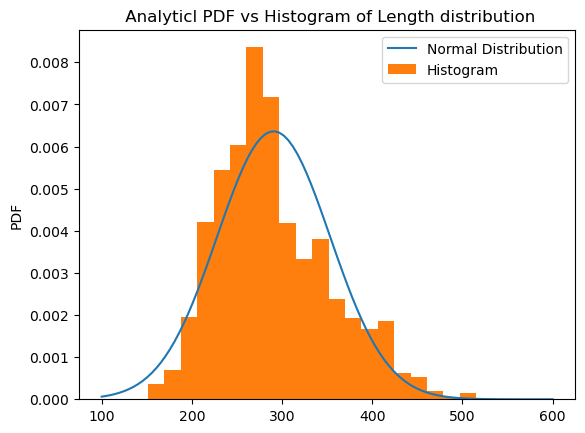

Average: 290.24391157278484
Standard deviation: 53.77955146850588
Size: 2803


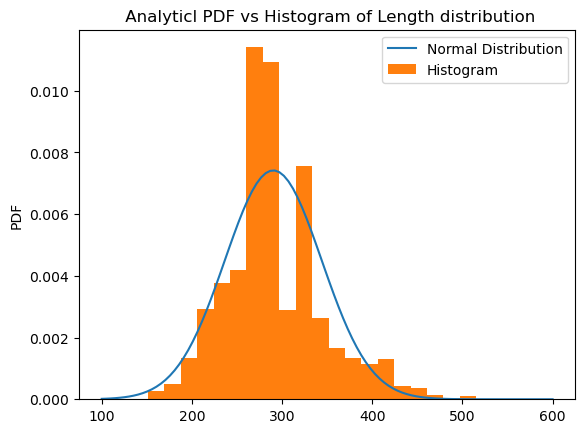

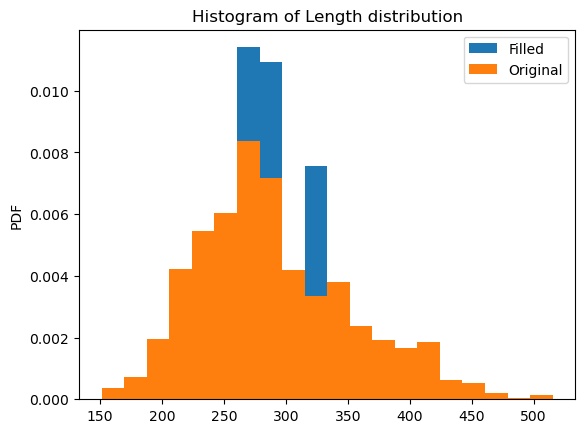

In [6]:
# Length
L=df["Length (major axis)"]
avg=np.mean(L)
SD=np.std(L)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(L))


#define x-axis values
x = np.linspace (100, 600, 100) 

#calculate pdf of distributions for each x-value
y1 = scipy.stats.norm.pdf(x=x, loc=avg, scale=SD)    #analytical norm pdf

#create plot of distribution
plt.figure()
plt.plot(x, y1,label="Normal Distribution")
plt.hist(L,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analyticl PDF vs Histogram of Length distribution")
plt.ylabel("PDF")
plt.show()

# Function to generate random samples from normal distribution for each group
def fill_random_normal(group):
    # Calculate mean and std dev for the group
    mean = group["Length (major axis)"].mean()
    std = group["Length (major axis)"].std()

    # Generate random samples for NaN values
    #group["Length (major axis)"] = group["Length (major axis)"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Length (major axis)"] = group["Length (major axis)"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
df.isnull().sum()

# Filled data
L_fill=df["Length (major axis)"]
avg=np.mean(L_fill)
SD=np.std(L_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(L_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x, loc=avg, scale=SD)    #analytical norm pdf

#create plot of distribution
plt.figure()
plt.plot(x, y_fill,label="Normal Distribution")
plt.hist(L_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analyticl PDF vs Histogram of Length distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x, y_fill,label="Normal Distribution")
plt.hist(L_fill,bins=20,density=True, label="Filled")
plt.hist(L,bins=20,density=True, label="Original")
plt.legend()
plt.title("Histogram of Length distribution")
plt.ylabel("PDF")
plt.show()

Average: 171.0259150977035
Standard deviation: 29.90849057262005
Size: 2803


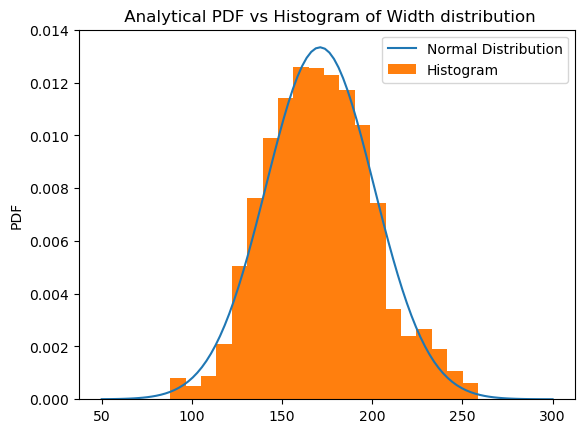

171.5635312945839
35.6442218461634
--------
161.1988074619524
22.783781708553672
--------
180.12266856479798
26.656262476084727
--------
Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Average: 171.0152499720589
Standard deviation: 24.784355915053638
Size: 2803


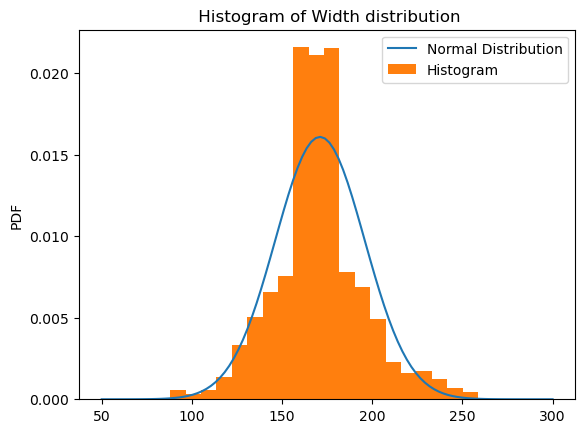

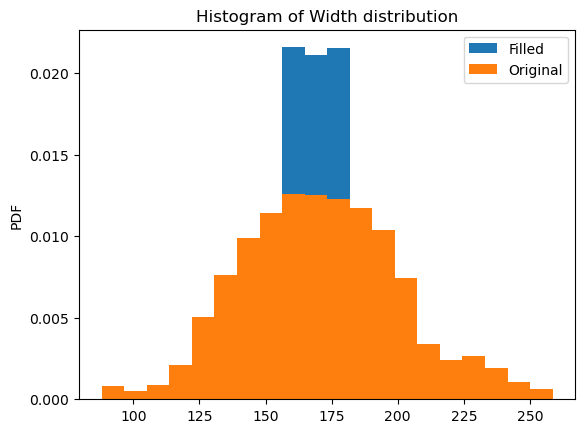

In [7]:
# Width
W=df["Width (minor axis)"]
avg=np.mean(W)
SD=np.std(W)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(W))


#define x-axis values
x2 = np.linspace (50, 300, 100) 

#calculate pdf of distributions for each x-value
y2 = scipy.stats.norm.pdf(x=x2, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x2, y2,label="Normal Distribution")
plt.hist(W,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Width distribution")
plt.ylabel("PDF")
plt.show()

# Function to generate random samples from a normal distribution for each group
def fill_random_normal(group):
    # Calculate mean and std dev for the group
    mean = group["Width (minor axis)"].mean()
    std = group["Width (minor axis)"].std()

    print(mean)
    print(std)
    print("--------")

    # Generate random samples for NaN values
    #group["Width (minor axis)"] = group["Width (minor axis)"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Width (minor axis)"] = group["Width (minor axis)"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
print(df.isnull().sum())

# Filled data
W_fill=df["Width (minor axis)"]
avg=np.mean(W_fill)
SD=np.std(W_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(W_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x2, loc=avg, scale=SD)    #analytical norm pdf

#create plot of distribution
plt.figure()
plt.plot(x2, y_fill,label="Normal Distribution")
plt.hist(W_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Histogram of Width distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x2, y_fill,label="Normal Distribution")
plt.hist(W_fill,bins=20,density=True, label="Filled")
plt.hist(W,bins=20,density=True, label="Original")
plt.legend()
plt.title("Histogram of Width distribution")
plt.ylabel("PDF")
plt.show()

Average: 109.70537795511599
Standard deviation: 18.93533190802347
Size: 2803


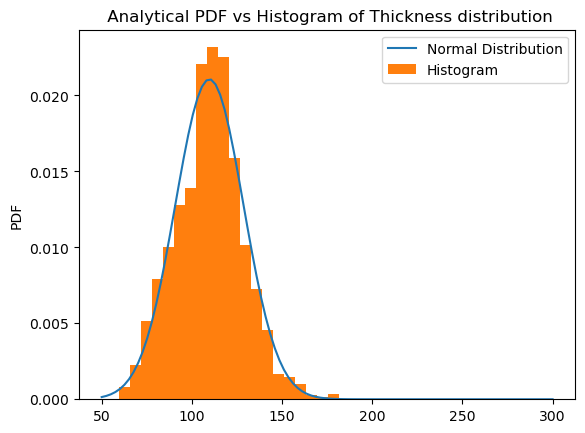

100.80497747680451
19.84086948145674
--------
112.3277803085175
14.511586389577921
--------
115.3717401666779
18.94663856060503
--------
Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Average: 109.51639219016468
Standard deviation: 15.642660506124436
Size: 2803


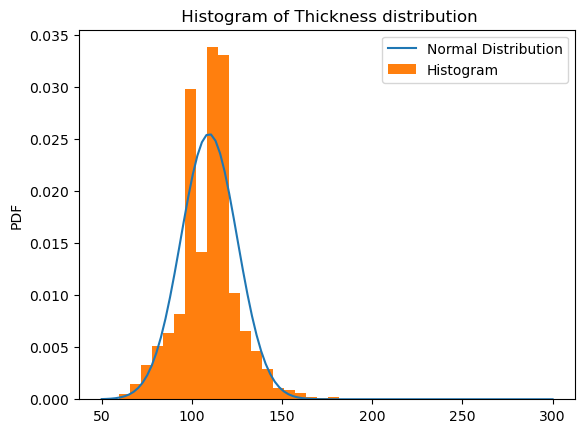

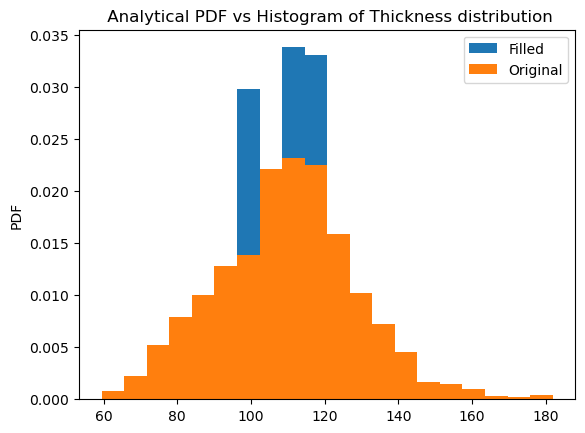

In [8]:
# Thickness
T=df["Thickness (depth)"]
avg=np.mean(T)
SD=np.std(T)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(T))


#define x-axis values
x3 = np.linspace (50, 300, 100) 

#calculate pdf of distributions for each x-value
y3 = scipy.stats.norm.pdf(x=x3, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x3, y3,label="Normal Distribution")
plt.hist(T,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Thickness distribution")
plt.ylabel("PDF")
plt.show()

# Function to generate random samples from a normal distribution for each group
def fill_random_normal(group):
    # Calculate the mean and std dev for the group
    mean = group["Thickness (depth)"].mean()
    std = group["Thickness (depth)"].std()

    print(mean)
    print(std)
    print("--------")

    # Generate random samples for NaN values
    #group["Thickness (depth)"] = group["Thickness (depth)"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Thickness (depth)"] = group["Thickness (depth)"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
print(df.isnull().sum())

# Filled data
T_fill=df["Thickness (depth)"]
avg=np.mean(T_fill)
SD=np.std(T_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(T_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x3, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x3, y_fill,label="Normal Distribution")
plt.hist(T_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Histogram of Thickness distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x3, y_fill,label="Normal Distribution")
plt.hist(T_fill,bins=20,density=True, label="Filled")
plt.hist(T,bins=20,density=True, label="Original")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Thickness distribution")
plt.ylabel("PDF")
plt.show()

Average: 0.4704657463075716
Standard deviation: 0.11864256936436542
Size: 2803


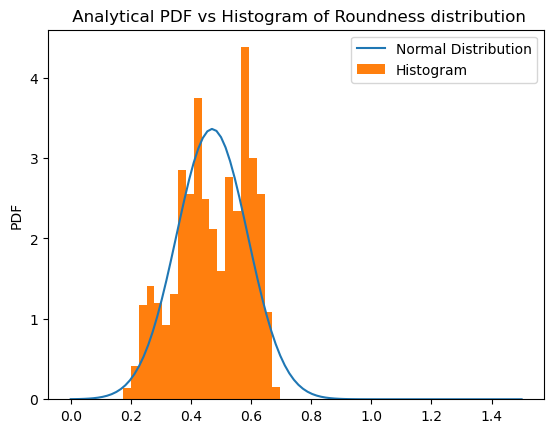

0.40384917807670795
0.1233404688617368
--------
0.5100437334904849
0.09181477447348338
--------
0.5000446964470665
0.10747028095738109
--------
Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                      0
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Average: 0.47133213444196637
Standard deviation: 0.10222693974888261
Size: 2803


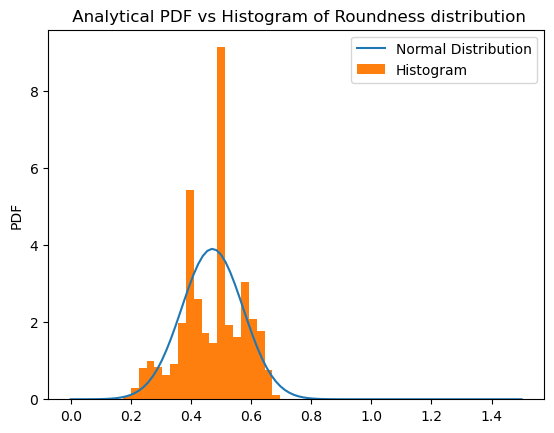

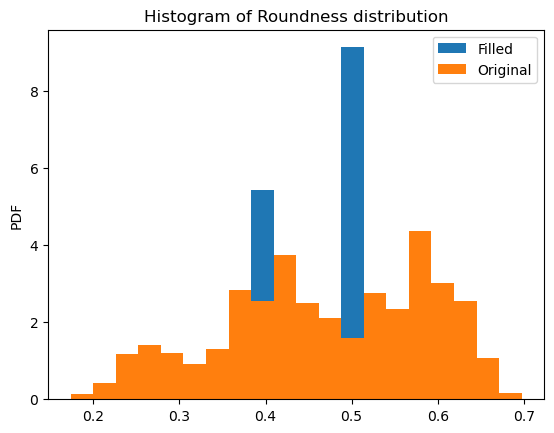

In [9]:
# Roundness
R=df["Roundness"]
avg=np.mean(R)
SD=np.std(R)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(R))


#define x-axis values
x4 = np.linspace (0, 1.5, 100) 

#calculate pdf of distributions for each x-value
y4 = scipy.stats.norm.pdf(x=x4, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x4, y4,label="Normal Distribution")
plt.hist(R,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Roundness distribution")
plt.ylabel("PDF")
plt.show()

# # drop rows containing NaN
# df.dropna(axis=0, inplace=True)

# print(df.isnull().sum())


# Function to generate random samples from a normal distribution for each group
def fill_random_normal(group):
    # Calculate the mean and std dev for the group
    mean = group["Roundness"].mean()
    std = group["Roundness"].std()

    print(mean)
    print(std)
    print("--------")

    # Generate random samples for NaN values
    #group["Roundness"] = group["Roundness"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Roundness"] = group["Roundness"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
print(df.isnull().sum())


# A=df["Area"]
# R_fill=np.zeros(len(R))
# for i in np.arange(len(R)):
#     if np.isnan(R[i]):
#         R_fill[i]= 4 * A[i] / (np.pi *(L_fill[i]) ** 2)
#     else:
#         R_fill[i]=R[i]

# # Replace the "Roundness" column with the calculated values from R_fill
# df["Roundness"] = R_fill

# print(df.isnull().sum())

# Filled data
R_fill=df["Roundness"]
avg=np.mean(R_fill)
SD=np.std(R_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(R_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x4, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x4, y_fill,label="Normal Distribution")
plt.hist(R_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Roundness distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x4, y_fill,label="Normal Distribution")
plt.hist(R_fill,bins=20,density=True, label="Filled")
plt.hist(R,bins=20,density=True, label="Original")
plt.legend()
plt.title("Histogram of Roundness distribution")
plt.ylabel("PDF")
plt.show()

Average: 1.7532155109873804
Standard deviation: 0.20651331944780887
Size: 2803


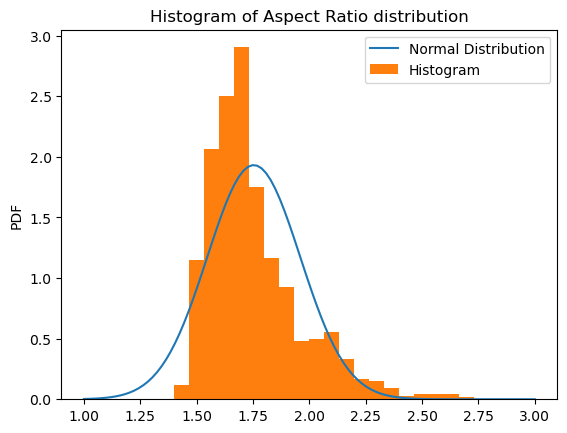

1.9230846417924636
0.23497531997424323
--------
1.6826570319876815
0.1211907543825396
--------
1.634304535099497
0.07493790997065429
--------
Unnamed: 0                     0
Length (major axis)            0
Width (minor axis)             0
Thickness (depth)              0
Area                           0
Perimeter                      0
Roundness                      0
Solidity                       0
Compactness                    0
Aspect Ratio                   0
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64
Average: 1.7464182005150821
Standard deviation: 0.15921909375931342
Size: 2803


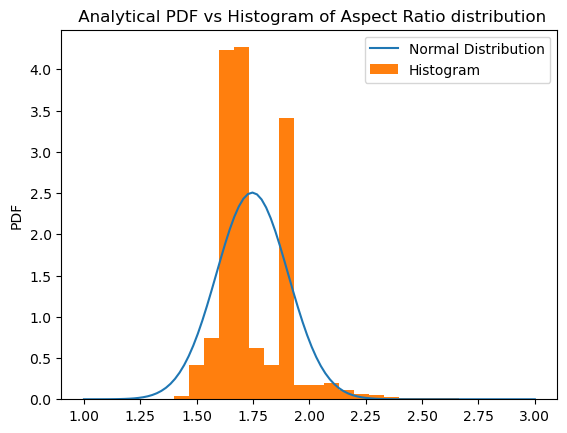

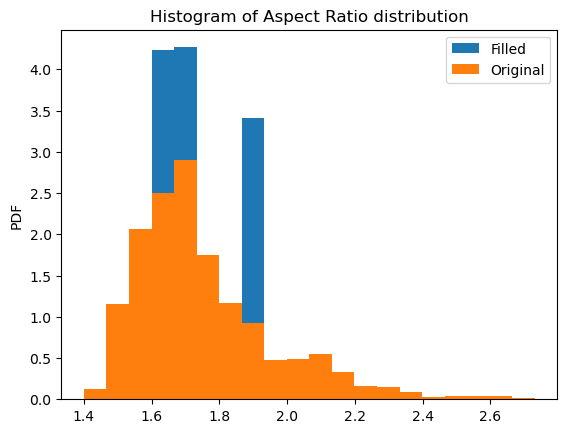

In [10]:
# Aspect ratio
AR=df["Aspect Ratio"]
avg=np.mean(AR)
SD=np.std(AR)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(AR))


#define x-axis values
x5 = np.linspace (1, 3, 100) 

#calculate pdf of distributions for each x-value
y5 = scipy.stats.norm.pdf(x=x5, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x5, y5,label="Normal Distribution")
plt.hist(AR,bins=20,density=True, label="Histogram")
plt.legend()
plt.title("Histogram of Aspect Ratio distribution")
plt.ylabel("PDF")
plt.show()

# Function to generate random samples from a normal distribution for each group
def fill_random_normal(group):
    # Calculate the mean and std dev for the group
    mean = group["Aspect Ratio"].mean()
    std = group["Aspect Ratio"].std()

    print(mean)
    print(std)
    print("--------")

    # Generate random samples for NaN values
    #group["Aspect Ratio"] = group["Aspect Ratio"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Aspect Ratio"] = group["Aspect Ratio"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
print(df.isnull().sum())


# # fill in missing values using equation
# AR_fill=np.zeros(len(AR))
# for i in np.arange(len(AR)):
#     if np.isnan(AR[i]):
#         AR_fill[i]= (L_fill[i])/(W_fill[i])
#     else:
#         AR_fill[i]=AR[i]

# # Replace the "Roundness" column with the calculated values from R_fill
# df["Aspect Ratio"] = AR_fill

# Filled data
AR_fill=df["Aspect Ratio"]
avg=np.mean(AR_fill)
SD=np.std(AR_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(AR_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x5, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x5, y_fill,label="Normal Distribution")
plt.hist(AR_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Aspect Ratio distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x5, y_fill,label="Normal Distribution")
plt.hist(AR_fill,bins=20,density=True, label="Filled")
plt.hist(AR,bins=20,density=True, label="Original")
plt.legend()
plt.title("Histogram of Aspect Ratio distribution")
plt.ylabel("PDF")
plt.show()

Average: 0.8131144037115479
Standard deviation: 0.041291108199170055
Size: 2803


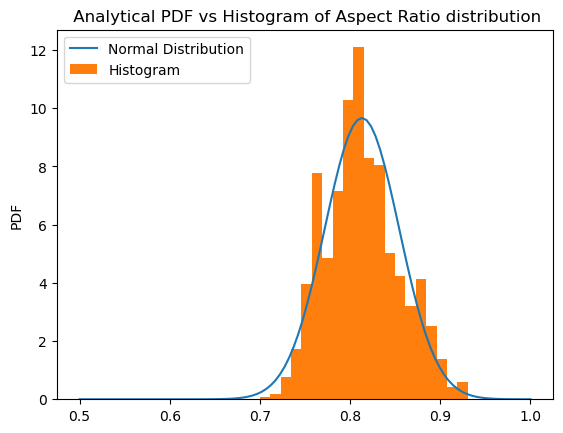

0.8463276806400367
0.03946056309565149
--------
0.8000936025732689
0.032912459344587926
--------
0.7890775098134641
0.022904016258556932
--------
Unnamed: 0                  0
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64
Average: 0.8117768774087304
Standard deviation: 0.031616959151539975
Size: 2803


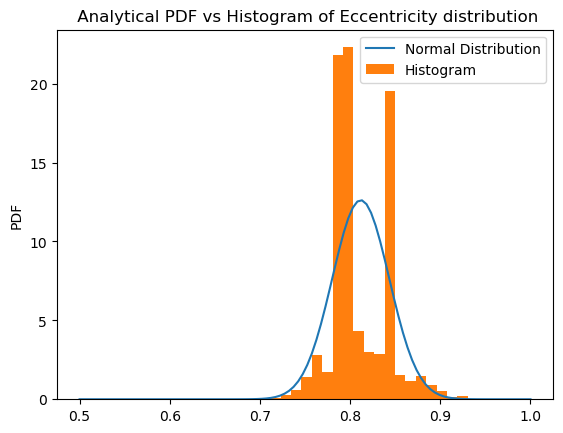

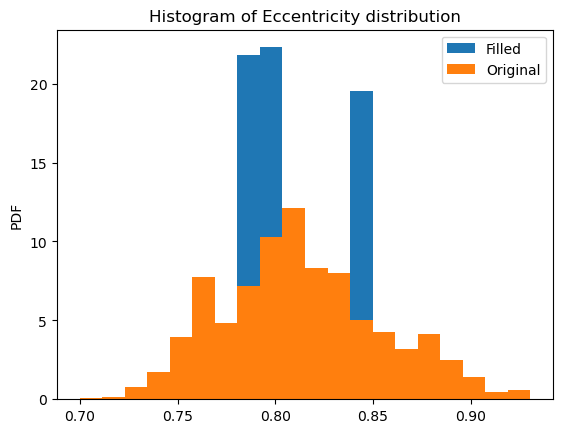

In [11]:
# Eccentricity
Ec=df["Eccentricity"]
avg=np.mean(Ec)
SD=np.std(Ec)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(Ec))


#define x-axis values
x6 = np.linspace (0.5, 1, 100) 

#calculate pdf of distributions for each x-value
y6 = scipy.stats.norm.pdf(x=x6, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x6, y6,label="Normal Distribution")
plt.hist(Ec,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Aspect Ratio distribution")
plt.ylabel("PDF")
plt.show()

# Function to generate random samples from a normal distribution for each group
def fill_random_normal(group):
    # Calculate the mean and std dev for the group
    mean = group["Eccentricity"].mean()
    std = group["Eccentricity"].std()

    print(mean)
    print(std)
    print("--------")

    # Generate random samples for NaN values
    #group["Eccentricity"] = group["Eccentricity"].apply(lambda x: np.random.normal(mean, std) if np.isnan(x) else x)
    group["Eccentricity"] = group["Eccentricity"].apply(lambda x: mean if np.isnan(x) else x)
    return group

# Apply the function to each group and reset the index to avoid index mismatch
df = df.groupby('Type').apply(fill_random_normal).reset_index(drop=True)
print(df.isnull().sum())

# Filled data
Ec_fill=df["Eccentricity"]
avg=np.mean(Ec_fill)
SD=np.std(Ec_fill)

print("Average:",avg)
print("Standard deviation:",SD)
print("Size:",len(Ec_fill))

#calculate pdf of distributions for each x-value
y_fill = scipy.stats.norm.pdf(x=x6, loc=avg, scale=SD)    #analytical norm pdf

#create a plot of distribution
plt.figure()
plt.plot(x6, y_fill,label="Normal Distribution")
plt.hist(Ec_fill,bins=20,density=True, label="Histogram")
plt.legend()
plt.title(" Analytical PDF vs Histogram of Eccentricity distribution")
plt.ylabel("PDF")
plt.show()

# overlay
plt.figure()
#plt.plot(x6, y_fill,label="Normal Distribution")
plt.hist(Ec_fill,bins=20,density=True, label="Filled")
plt.hist(Ec,bins=20,density=True, label="Original")
plt.legend()
plt.title("Histogram of Eccentricity distribution")
plt.ylabel("PDF")
plt.show()

In [12]:
df['Type'].value_counts()

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

## One-hot encoding
Neural Networks can only work with numerical data. The last column contains categorical data, classifying the Almonds as "Mamra", "Sanora" or "Regular". These are given as strings and should be transformed into numbers. One-hot encoding was used for this purpose

In [13]:
# first split the features and labels
X, y = df.iloc[:, 1:-1], df.iloc[:, [-1]]
X

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
0,321.807244,227.940628,127.759132,22619.0,643.813269,0.403849,0.973384,1.458265,1.923085,0.846328,0.681193,23237.5
1,321.807244,234.188126,128.199509,23038.0,680.984841,0.403849,0.957304,1.601844,1.923085,0.846328,0.656353,24065.5
2,321.807244,229.418610,125.796547,22386.5,646.943212,0.403849,0.967270,1.487772,1.923085,0.846328,0.683620,23144.0
3,321.807244,232.763153,125.918808,22578.5,661.227483,0.403849,0.965512,1.540979,1.923085,0.846328,0.685360,23385.0
4,321.807244,230.150742,107.253448,19068.0,624.842706,0.403849,0.951450,1.629395,1.923085,0.846328,0.714800,20041.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2798,283.245347,192.709366,122.356506,18471.5,653.345233,0.500045,0.931000,1.838965,1.634305,0.789078,0.725739,19840.5
2799,283.245347,186.254745,118.708961,17213.5,581.688379,0.500045,0.952706,1.564234,1.634305,0.789078,0.714016,18068.0
2800,283.245347,186.196182,119.147224,17510.5,608.315795,0.500045,0.948821,1.681705,1.634305,0.789078,0.718999,18455.0
2801,283.245347,188.660828,120.634438,17941.0,630.759446,0.500045,0.944810,1.764701,1.634305,0.789078,0.738191,18989.0


In [14]:
y_one_hot = pd.get_dummies(y, columns = ['Type'], dtype='int')
y_one_hot

,Type_MAMRA,Type_REGULAR,Type_SANORA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2798,0,0,1
2799,0,0,1
2800,0,0,1
2801,0,0,1


## Data set splitting

Split data:
- Train = 90%. K-fold cross-validation will be used. The training set contains training and validation data. 
- Test = 10%. 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.10, random_state=42)

In [16]:
X_train

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
2395,316.635315,188.510300,115.371740,46501.0,970.607205,0.590546,0.972763,1.612185,1.679671,0.803463,0.763413,47803.0
2320,283.245347,204.056671,120.667831,19396.5,561.570630,0.500045,0.983645,1.293825,1.634305,0.789078,0.698419,19719.0
900,191.820892,92.257477,100.804977,13783.5,534.859952,0.476955,0.955396,1.651622,2.079191,0.876745,0.703455,14427.0
188,321.807244,137.166687,83.105988,8328.5,383.119838,0.403849,0.940701,1.402467,1.923085,0.846328,0.704015,8853.5
170,346.594452,177.486313,100.804977,48539.0,1272.690466,0.514467,0.944954,2.655491,1.952795,0.858934,0.721598,51366.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,265.595645,137.125488,106.129364,11393.0,422.475176,0.510044,0.978276,1.246678,1.682657,0.800094,0.748161,11646.0
1095,242.086288,161.198807,101.678955,19202.0,650.073154,0.417173,0.968062,1.751331,1.682657,0.800094,0.707491,19835.5
1130,217.216965,115.854446,112.327780,19509.0,593.244728,0.526451,0.976720,1.435565,1.874913,0.845889,0.748102,19974.0
1294,337.210693,188.852615,112.327780,48928.0,967.210238,0.547854,0.978443,1.521509,1.785576,0.828463,0.785109,50006.0


In [17]:
X_test

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
1091,265.595645,130.175888,85.046555,8700.0,376.534052,0.510044,0.969629,1.296819,1.682657,0.800094,0.740552,8972.5
1041,265.595645,118.739342,80.672440,7415.5,348.291410,0.510044,0.972907,1.301773,1.682657,0.800094,0.688597,7622.0
1521,258.808685,161.198807,108.485023,21742.5,652.457929,0.413297,0.981625,1.558065,1.682657,0.800094,0.749897,22149.5
2502,213.041779,180.122669,98.127411,16401.0,667.528999,0.460099,0.956271,2.162022,1.634305,0.789078,0.716201,17151.0
1518,269.484314,161.198807,115.760727,24132.5,720.742202,0.423102,0.959047,1.712962,1.682657,0.800094,0.706455,25163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1321,265.595645,154.184448,102.262245,12135.0,441.220343,0.510044,0.976071,1.276619,1.682657,0.800094,0.785284,12432.5
29,393.622711,177.828964,100.804977,51626.5,1347.986930,0.424251,0.924883,2.800843,2.213490,0.892132,0.627449,55819.5
1800,227.627579,161.198807,78.197243,13671.0,531.019334,0.335939,0.985901,1.641385,1.682657,0.800094,0.765711,13866.5
1429,325.945282,193.016235,112.327780,48797.5,937.938160,0.584815,0.979171,1.434634,1.688694,0.805810,0.768695,49835.5


In [18]:
y_train

,Type_MAMRA,Type_REGULAR,Type_SANORA
2395,0,0,1
2320,0,0,1
900,1,0,0
188,1,0,0
170,1,0,0
...,...,...,...
1638,0,1,0
1095,0,1,0
1130,0,1,0
1294,0,1,0


In [19]:
y_test

,Type_MAMRA,Type_REGULAR,Type_SANORA
1091,0,1,0
1041,0,1,0
1521,0,1,0
2502,0,0,1
1518,0,1,0
...,...,...,...
1321,0,1,0
29,1,0,0
1800,0,1,0
1429,0,1,0


## Normalization
The different columns have different ranges. 
Neural Networks perform better on normalised data. There is also the risk that features with higher values will weigh more during the training of the NN. This is dangerous since the model may be missing some important information completely just because it is in a range between 0 and 1 while another feature is between -2000 and 2000. 

https://medium.com/@hhuseyincosgun/which-data-scaling-technique-should-i-use-a1615292061e

It was decided to use MinMax scaling since this method maintains the relative data relationships through linear scaling. It improves the performance of algorithms sensitive to the scale of input features, such as gradient-based optimisation algorithms. The greatest drawback is that it can be severely impacted by outliers, as scaling hinges on minimum and maximum values, allowing outliers to disproportionately affect the process. 


In [20]:
# check the min and max values of the training data
X_train.min(), X_train.max()

(Length (major axis)          151.335266
 Width (minor axis)            88.050529
 Thickness (depth)             59.494278
 Area                        6037.000000
 Perimeter                    311.563489
 Roundness                      0.173748
 Solidity                       0.718772
 Compactness                    1.164469
 Aspect Ratio                   1.400082
 Eccentricity                   0.699897
 Extent                         0.454538
 Convex hull(convex area)    6355.000000
 dtype: float64,
 Length (major axis)           512.625305
 Width (minor axis)            258.569794
 Thickness (depth)             181.845200
 Area                        89282.000000
 Perimeter                    1864.947387
 Roundness                       0.697293
 Solidity                        0.992706
 Compactness                     9.660057
 Aspect Ratio                    2.731251
 Eccentricity                    0.930563
 Extent                          0.845813
 Convex hull(convex area)    

In [21]:
L_min=X_train["Length (major axis)"].min()
L_max=X_train["Length (major axis)"].max()
W_min=X_train["Width (minor axis)"].min()
W_max=X_train["Width (minor axis)"].max()
T_min=X_train["Thickness (depth)"].min()
T_max=X_train["Thickness (depth)"].max()
A_min=X_train["Area"].min()
A_max=X_train["Area"].max()
P_min=X_train["Perimeter"].min()
P_max=X_train["Perimeter"].max()
R_min=X_train["Roundness"].min()
R_max=X_train["Roundness"].max()
S_min=X_train["Solidity"].min()
S_max=X_train["Solidity"].max()
C_min=X_train["Compactness"].min()
C_max=X_train["Compactness"].max()
AR_min=X_train["Aspect Ratio"].min()
AR_max=X_train["Aspect Ratio"].max()
Ec_min=X_train["Eccentricity"].min()
Ec_max=X_train["Eccentricity"].max()
E_min=X_train["Extent"].min()
E_max=X_train["Extent"].max()
con_min=X_train["Convex hull(convex area)"].min()
con_max=X_train["Convex hull(convex area)"].max()

In [22]:
# Min-Max scaling of training data
X_train["Length (major axis)"]= (X_train["Length (major axis)"]- L_min)/(L_max-L_min)
X_train["Width (minor axis)"] = (X_train["Width (minor axis)"]- W_min)/(W_max-W_min)
X_train["Thickness (depth)"] = (X_train["Thickness (depth)"]- T_min)/(T_max-T_min)
X_train["Area"] = (X_train["Area"]- A_min)/(A_max-A_min)
X_train["Perimeter"] = (X_train["Perimeter"]- P_min)/(P_max-P_min)
X_train["Roundness"] = (X_train["Roundness"]- R_min)/(R_max-R_min)
X_train["Solidity"] = (X_train["Solidity"]- S_min)/(S_max-S_min)
X_train["Compactness"] = (X_train["Compactness"]- C_min)/(C_max-C_min)
X_train["Aspect Ratio"] = (X_train["Aspect Ratio"]- AR_min)/(AR_max-AR_min)
X_train["Eccentricity"] = (X_train["Eccentricity"]- Ec_min)/(Ec_max-Ec_min)
X_train["Extent"] = (X_train["Extent"]- E_min)/(E_max-E_min)
X_train["Convex hull(convex area)"] = (X_train["Convex hull(convex area)"]- con_min)/(con_max-con_min)

In [23]:
# check the min and max values of the training data
X_train.min(), X_train.max()

(Length (major axis)         0.0
 Width (minor axis)          0.0
 Thickness (depth)           0.0
 Area                        0.0
 Perimeter                   0.0
 Roundness                   0.0
 Solidity                    0.0
 Compactness                 0.0
 Aspect Ratio                0.0
 Eccentricity                0.0
 Extent                      0.0
 Convex hull(convex area)    0.0
 dtype: float64,
 Length (major axis)         1.0
 Width (minor axis)          1.0
 Thickness (depth)           1.0
 Area                        1.0
 Perimeter                   1.0
 Roundness                   1.0
 Solidity                    1.0
 Compactness                 1.0
 Aspect Ratio                1.0
 Eccentricity                1.0
 Extent                      1.0
 Convex hull(convex area)    1.0
 dtype: float64)

In [24]:
# Min-Max scaling of testing data
X_test["Length (major axis)"]= (X_test["Length (major axis)"]- L_min)/(L_max-L_min)
X_test["Width (minor axis)"] = (X_test["Width (minor axis)"]- W_min)/(W_max-W_min)
X_test["Thickness (depth)"] = (X_test["Thickness (depth)"]- T_min)/(T_max-T_min)
X_test["Area"] = (X_test["Area"]- A_min)/(A_max-A_min)
X_test["Perimeter"] = (X_test["Perimeter"]- P_min)/(P_max-P_min)
X_test["Roundness"] = (X_test["Roundness"]- R_min)/(R_max-R_min)
X_test["Solidity"] = (X_test["Solidity"]- S_min)/(S_max-S_min)
X_test["Compactness"] = (X_test["Compactness"]- C_min)/(C_max-C_min)
X_test["Aspect Ratio"] = (X_test["Aspect Ratio"]- AR_min)/(AR_max-AR_min)
X_test["Eccentricity"] = (X_test["Eccentricity"]- Ec_min)/(Ec_max-Ec_min)
X_test["Extent"] = (X_test["Extent"]- E_min)/(E_max-E_min)
X_test["Convex hull(convex area)"] = (X_test["Convex hull(convex area)"]- con_min)/(con_max-con_min)

In [25]:
# check the min and max values of the testing data
X_test.min(), X_test.max()

(Length (major axis)         0.045642
 Width (minor axis)          0.116209
 Thickness (depth)           0.078528
 Area                        0.001778
 Perimeter                   0.006125
 Roundness                   0.054239
 Solidity                    0.276048
 Compactness                 0.000353
 Aspect Ratio                0.037092
 Eccentricity                0.104027
 Extent                      0.202530
 Convex hull(convex area)    0.002100
 dtype: float64,
 Length (major axis)         1.007548
 Width (minor axis)          0.995438
 Thickness (depth)           0.807331
 Area                        0.870857
 Perimeter                   0.877773
 Roundness                   0.965684
 Solidity                    1.000669
 Compactness                 0.666371
 Aspect Ratio                0.900264
 Eccentricity                0.967142
 Extent                      0.970062
 Convex hull(convex area)    0.895791
 dtype: float64)

## Build a multi-class classification model

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4306 
Test Accuracy: 0.7971529960632324
Test Loss: 0.44372454285621643


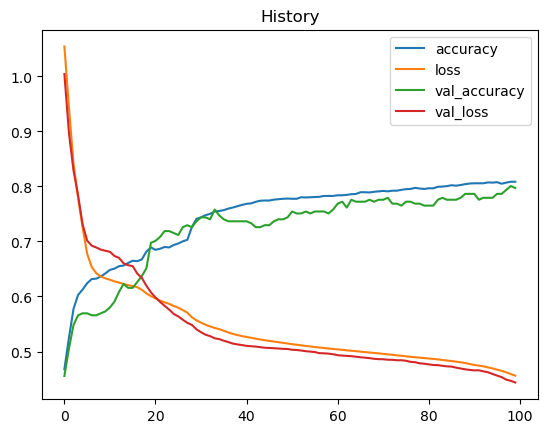

In [26]:
# set random seed
tf.random.set_seed(42)
np.random.seed(42)

# create model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

# compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# fit
H=model.fit(X_train, 
            y_train, 
            epochs=100, 
            validation_data=(X_test, y_test),
            verbose=0)

pd.DataFrame(H.history).plot(title="History")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

In [27]:
#check model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

## Evaluate performance

In [28]:
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# make predictions
y_pred_prob=model.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels

# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

Type=df['Type'].unique()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [29]:
print(y_preds[0:50])
print(y_test_class[0:50])
pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

print(pred_class.value_counts())
print("-------------------------")
print(test_class.value_counts())

[1 1 1 2 1 0 0 0 2 1 2 2 1 0 0 2 2 2 2 1 0 1 1 2 2 2 0 1 1 2 0 2 1 0 2 2 2
 1 0 2 0 2 2 2 1 2 2 2 2 2]
[1 1 1 2 1 0 0 0 2 2 2 2 1 0 0 1 2 2 2 2 0 1 1 2 2 2 0 0 0 2 0 1 1 0 2 2 2
 1 0 2 0 2 2 2 2 2 2 2 2 2]
SANORA     103
REGULAR     99
MAMRA       79
Name: count, dtype: int64
-------------------------
REGULAR    106
SANORA      89
MAMRA       86
Name: count, dtype: int64


Confusion matrix, without normalization
[[78  8  0]
 [ 1 74 31]
 [ 0 17 72]]
Normalized confusion matrix
[[0.91 0.09 0.  ]
 [0.01 0.7  0.29]
 [0.   0.19 0.81]]


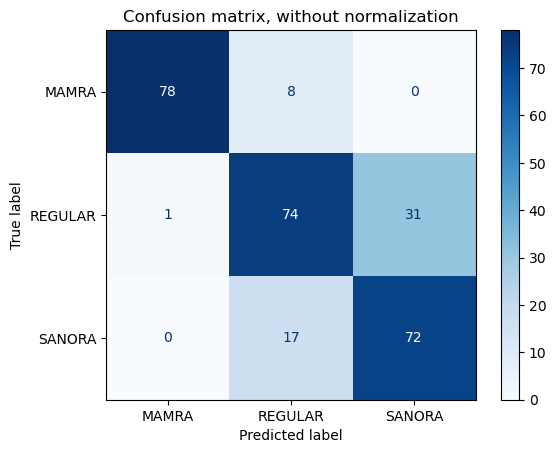

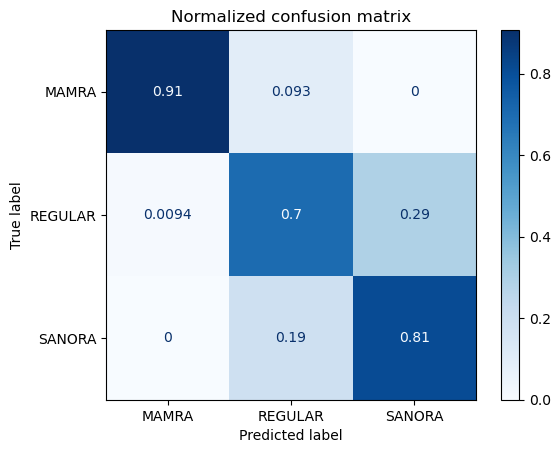

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Add K-fold cross validation

In [31]:
from sklearn.model_selection import KFold
import time

tic = time.time()

# set number of folds
k=5

# set random seed
tf.random.set_seed(42)
np.random.seed(42)

# K-fold indices
kf=KFold(n_splits=k, shuffle=True, random_state=42)

# initialise lists to store the accuracy and the loss for each fold
fold_accuracy=[]
fold_loss=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Convert X_train and X_test to NumPy arrays if necessary
    #X_train = X_train.values
    #X_val = X_val.values

    # create model
    model2=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

    # fit
    H2=model2.fit(X_trainK, 
                y_trainK, 
                epochs=100, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model2.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fold_accuracy.append(val_accuracy)
    fold_loss.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

# Average accuracy and loss across all folds
average_accuracy = np.mean(fold_accuracy)
accuracy_SD = np.std(fold_accuracy)
average_loss = np.mean(fold_loss)
loss_SD = np.std(fold_loss)

print(f'Average Validation Accuracy: {average_accuracy}')
print(f'Average Validation Loss: {average_loss}')
print(f'Standard deviation Validation Accuracy: {accuracy_SD}')
print(f'Standard deviation Validation Loss: {loss_SD}')

toc = time.time()
computation_time = toc - tic
print("computation_time", computation_time)

Fold 1
Fold 1 Test Accuracy: 0.8277227878570557
Fold 1 Test Loss: 0.5027759075164795
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.7227723002433777
Fold 2 Test Loss: 0.4934428036212921
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.6884920597076416
Fold 3 Test Loss: 0.6529984474182129
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.8849206566810608
Fold 4 Test Loss: 0.32848748564720154
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.7757936716079712
Fold 5 Test Loss: 0.47964581847190857
---------------------------------------
Average Validation Accuracy: 0.7799402952194214
Average Validation Loss: 0.49147009253501894
Standard deviation Validation Accuracy: 0.07064304185191345
Standard deviation Validation Loss: 0.10288465976788215
computation_time 113.58561587333679


In [32]:
# Evaluate the model on test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5075 
Test Accuracy: 0.754448413848877
Test Loss: 0.519154965877533


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
SANORA     102
REGULAR     97
MAMRA       82
Name: count, dtype: int64
-------------------------
REGULAR    106
SANORA      89
MAMRA       86
Name: count, dtype: int64
Confusion matrix, without normalization
[[78  6  2]
 [ 4 68 34]
 [ 0 23 66]]
Normalized confusion matrix
[[0.91 0.07 0.02]
 [0.04 0.64 0.32]
 [0.   0.26 0.74]]


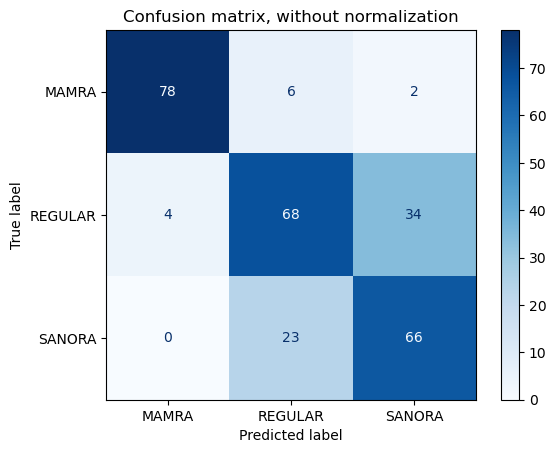

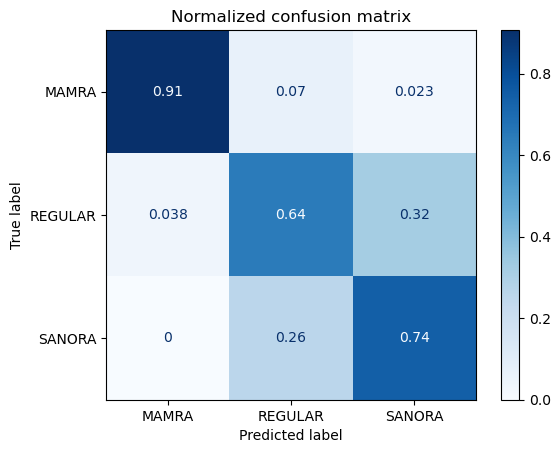

In [33]:
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# make predictions
y_pred_prob=model2.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels

# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

print(pred_class.value_counts())
print("-------------------------")
print(test_class.value_counts())

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Hyperparameter optimazation
THe Neural Network contains many different hyper parameters. There ara no set rules to what the values of these parameters should be. The optimal values can be found through a grid search. Some Hyperparameters include:
- Number of hidden layers
- Number of neurons per layer
- Activation function
- Learning rate
- Optimizer
- Number of Epochs

Note that the optimizer function is investigated in the next section. 

The following ranges are explored:
- Number of hidden layers [1, 2, 3, 4, 5, 6]
- Number of neurons per layer [2, 4, 8, 16, 32, 64]
- Number of Epochs [20, 50, 100, 150, 300]

In [34]:
import seaborn as sns
from sklearn.model_selection import KFold
import time

# Define grid for hyperparameters (you can change values as needed)
hidden_layer_options = [1, 2, 3, 4, 5, 6]  # Number of hidden layers
neurons_per_layer_options = [2, 4, 8, 16, 32, 64]  # Neurons in each hidden layer

# Initialize arrays to store results
results = []

# Nested loops for grid search - vary two parameters at a time (example: layers and neurons)
for L in hidden_layer_options:
    for N in neurons_per_layer_options:
        print(f"Running Grid Search for L={L}, N={N}")
        
        # For time tracking
        tic = time.time()
        
        # k-fold setup
        k = 5
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        
        # Lists to store accuracy and loss for each fold
        fold_accuracies = []
        fold_losses = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            # Split the data
            X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # Build the model with the current parameters
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Input(shape=(12,)))
            model.add(tf.keras.layers.Dense(N, activation='relu'))
            for _ in range(L - 1):  # Add hidden layers based on L
                model.add(tf.keras.layers.Dense(N, activation='relu'))
            model.add(tf.keras.layers.Dense(3, activation='softmax'))  # Output layer
            
            # Compile the model
            model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["accuracy"])
            
            # Fit the model
            history = model.fit(X_trainK, y_trainK, epochs=100, validation_data=(X_val, y_val), verbose=0)
            
            # Evaluate the model
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
            fold_accuracies.append(val_accuracy)
            fold_losses.append(val_loss)
        
        # Compute average and standard deviation of accuracy and loss
        avg_accuracy = np.mean(fold_accuracies)
        avg_loss = np.mean(fold_losses)
        std_accuracy = np.std(fold_accuracies)
        std_loss = np.std(fold_losses)
        print("-----------------------")
        print("avg_accuracy",avg_accuracy)
        print("avg_loss",avg_loss)
        print("std_accuracy", std_accuracy)
        print("std_loss", std_loss)
        
        # Time tracking
        toc = time.time()
        computation_time = toc - tic
        print("computation_time", computation_time)
        print("------------------------")
        
        # Store results (L, N, avg accuracy, avg loss, time)
        results.append([L, N, avg_accuracy, avg_loss, computation_time])

# Convert results to a NumPy array for easier processing
results1 = np.array(results)

Running Grid Search for L=1, N=2
-----------------------
avg_accuracy 0.7711943984031677
avg_loss 0.5688237071037292
std_accuracy 0.04097110399128369
std_loss 0.04956069005883473
computation_time 92.20986366271973
------------------------
Running Grid Search for L=1, N=4
-----------------------
avg_accuracy 0.7890429139137268
avg_loss 0.5695774793624878
std_accuracy 0.04867482903643815
std_loss 0.05699133020324101
computation_time 85.6959924697876
------------------------
Running Grid Search for L=1, N=8
-----------------------
avg_accuracy 0.8112737655639648
avg_loss 0.48969783782958987
std_accuracy 0.019275382100722237
std_loss 0.05006979597659456
computation_time 85.68230485916138
------------------------
Running Grid Search for L=1, N=16
-----------------------
avg_accuracy 0.8184134721755981
avg_loss 0.4707484424114227
std_accuracy 0.022664554208827542
std_loss 0.08408362228516998
computation_time 84.0633647441864
------------------------
Running Grid Search for L=1, N=32
--------

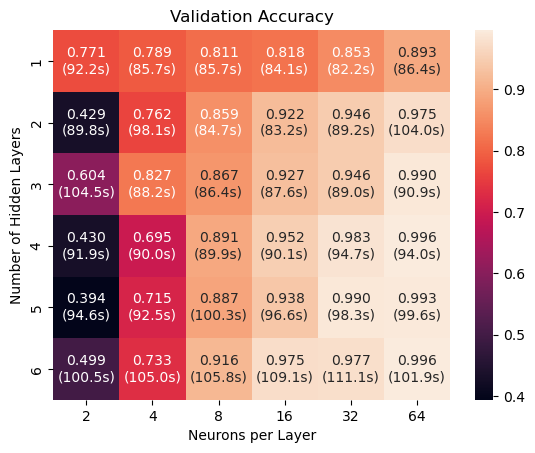

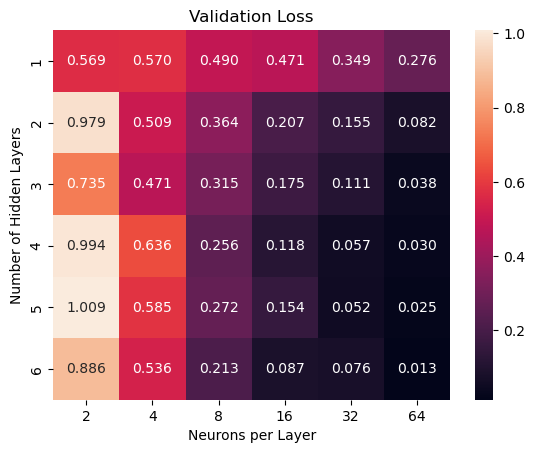

In [35]:
# Plot heatmaps for accuracy and loss
Hyp_LN = results1[:, 2].reshape(len(hidden_layer_options), len(neurons_per_layer_options))
Time_LN = results1[:, 4].reshape(len(hidden_layer_options), len(neurons_per_layer_options))

# Combine scores and times into a string for each cell
annot1 = [[f"{score:.3f}\n({time:.1f}s)" for score, time in zip(score_row, time_row)]
         for score_row, time_row in zip(Hyp_LN, Time_LN)]

# Subplot for accuracy heatmap
plt.figure()
sns.heatmap(Hyp_LN, annot=annot1, fmt="", xticklabels=neurons_per_layer_options, yticklabels=hidden_layer_options)
plt.title("Validation Accuracy")
plt.xlabel("Neurons per Layer")
plt.ylabel("Number of Hidden Layers")
plt.show()

# Subplot for loss heatmap
plt.figure()
loss_heatmap_data = results1[:, 3].reshape(len(hidden_layer_options), len(neurons_per_layer_options))
sns.heatmap(loss_heatmap_data, annot=True, fmt=".3f", xticklabels=neurons_per_layer_options, yticklabels=hidden_layer_options)
plt.title("Validation Loss")
plt.xlabel("Neurons per Layer")
plt.ylabel("Number of Hidden Layers")
plt.show()


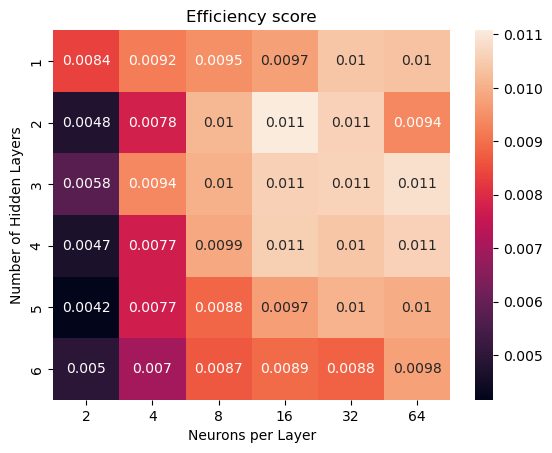

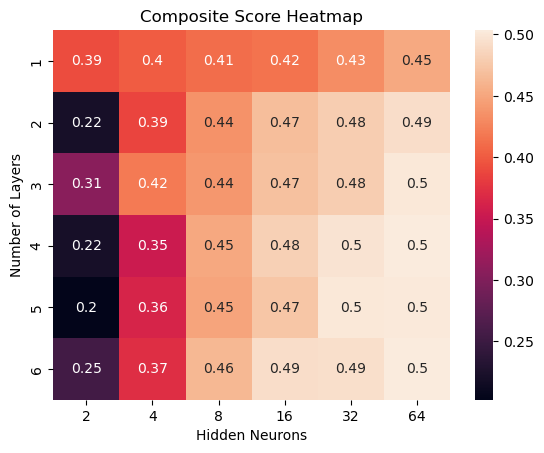

In [36]:
# Calculate the efficiency metric 
Eff=Hyp_LN/Time_LN

plt.figure()
sns.heatmap(Eff, annot=True, xticklabels=neurons_per_layer_options, yticklabels=hidden_layer_options)
plt.title("Efficiency score")
plt.xlabel("Neurons per Layer")
plt.ylabel("Number of Hidden Layers")
plt.show()

# Calculate composite score (using inverted time)
alpha = 0.5  # weight for accuracy
beta = 0.5   # weight for time (inverted)
composite_score_matrix = alpha * Hyp_LN + beta * (1 / Time_LN)

# Plot heatmap of the composite scores
plt.figure()
sns.heatmap(composite_score_matrix, annot=True, xticklabels=neurons_per_layer_options, yticklabels=hidden_layer_options)
plt.title("Composite Score Heatmap")
plt.xlabel("Hidden Neurons")
plt.ylabel("Number of Layers")
plt.show()

It seems like there is a clear advantage in using 32 neurons per layer but it is not that clear howmany hidden layers should be used. Next the effect of the number of epochs will be investigated. 
- Number of hidden layers [1, 2, 3, 4, 5]
- Number of Epochs [20, 50, 100, 150, 200]

In [37]:
# Define grid for hyperparameters (you can change values as needed)
hidden_layer_options = [1, 2, 3, 4, 5]  # Number of hidden layers
number_of_epochs = [20, 50, 100, 150, 300]  # Neurons in each hidden layer

# Initialize arrays to store results
results = []

# Nested loops for grid search - vary two parameters at a time (example: layers and neurons)
for L in hidden_layer_options:
    for E in number_of_epochs:
        print(f"Running Grid Search for L={L}, E={E}")
        
        # For time tracking
        tic = time.time()
        
        # k-fold setup
        k = 5
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        
        # Lists to store accuracy and loss for each fold
        fold_accuracies = []
        fold_losses = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            # Split the data
            X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # Build the model with the current parameters
            N=32
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Input(shape=(12,)))
            model.add(tf.keras.layers.Dense(N, activation='relu'))
            for _ in range(L - 1):  # Add hidden layers based on L
                model.add(tf.keras.layers.Dense(N, activation='relu'))
            model.add(tf.keras.layers.Dense(3, activation='softmax'))  # Output layer
            
            # Compile the model
            model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                          metrics=["accuracy"])
            
            # Fit the model
            history = model.fit(X_trainK, y_trainK, epochs=E, validation_data=(X_val, y_val), verbose=0)
            
            # Evaluate the model
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
            fold_accuracies.append(val_accuracy)
            fold_losses.append(val_loss)
        
        # Compute average and standard deviation of accuracy and loss
        avg_accuracy = np.mean(fold_accuracies)
        avg_loss = np.mean(fold_losses)
        std_accuracy = np.std(fold_accuracies)
        std_loss = np.std(fold_losses)
        print("-----------------------")
        print("avg_accuracy",avg_accuracy)
        print("avg_loss",avg_loss)
        print("std_accuracy", std_accuracy)
        print("std_loss", std_loss)
        
        # Time tracking
        toc = time.time()
        computation_time = toc - tic
        print("computation_time", computation_time)
        print("------------------------")
        
        # Store results (L, N, avg accuracy, avg loss, time)
        results.append([L, E, avg_accuracy, avg_loss, computation_time])

# Convert results to a NumPy array for easier processing
results2 = np.array(results)

Running Grid Search for L=1, E=20
-----------------------
avg_accuracy 0.7815204977989196
avg_loss 0.5554483294486999
std_accuracy 0.020096261525717186
std_loss 0.04385627345537251
computation_time 22.686681270599365
------------------------
Running Grid Search for L=1, E=50
-----------------------
avg_accuracy 0.8196000218391418
avg_loss 0.46640095114707947
std_accuracy 0.016499846508400227
std_loss 0.04054872219733906
computation_time 43.27597951889038
------------------------
Running Grid Search for L=1, E=100
-----------------------
avg_accuracy 0.8525113940238953
avg_loss 0.3583115577697754
std_accuracy 0.023331508922069834
std_loss 0.04547383403674555
computation_time 86.60348868370056
------------------------
Running Grid Search for L=1, E=150
-----------------------
avg_accuracy 0.8917554497718811
avg_loss 0.27410014867782595
std_accuracy 0.010358129383641007
std_loss 0.01650374228567227
computation_time 118.39174246788025
------------------------
Running Grid Search for L=1, E

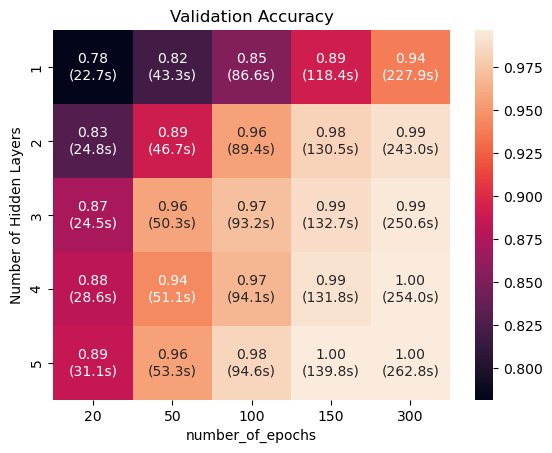

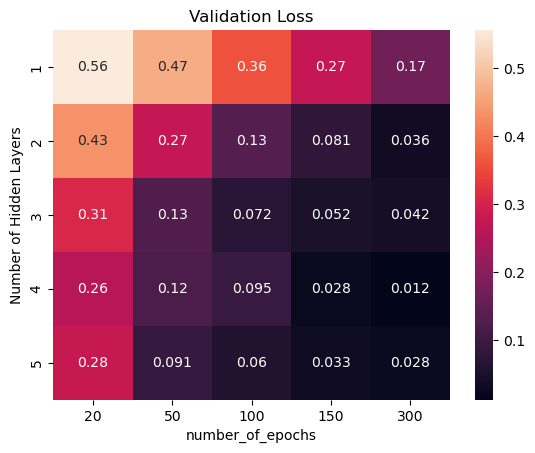

In [38]:
Hyp_LE=results2[:, 2].reshape(len(hidden_layer_options), len(number_of_epochs))
Time_LE=results2[:, 4].reshape(len(hidden_layer_options), len(number_of_epochs))

# Combine scores and times into a string for each cell
annot2 = [[f"{score:.2f}\n({time:.1f}s)" for score, time in zip(score_row, time_row)]
         for score_row, time_row in zip(Hyp_LE, Time_LE)]

plt.figure()
sns.heatmap(Hyp_LE, annot=annot2, fmt="", xticklabels=number_of_epochs, yticklabels=hidden_layer_options)
plt.title("Validation Accuracy")
plt.xlabel("number_of_epochs")
plt.ylabel("Number of Hidden Layers")
plt.show()

plt.figure()
loss_heatmap_data = results2[:, 3].reshape(len(hidden_layer_options), len(number_of_epochs))
sns.heatmap(loss_heatmap_data, annot=True, xticklabels=number_of_epochs, yticklabels=hidden_layer_options)
plt.title("Validation Loss")
plt.xlabel("number_of_epochs")
plt.ylabel("Number of Hidden Layers")
plt.show()

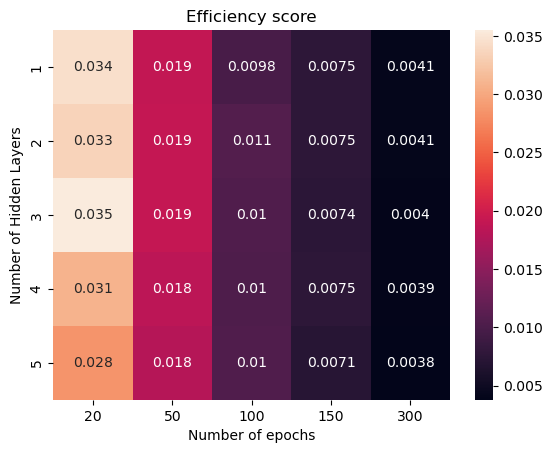

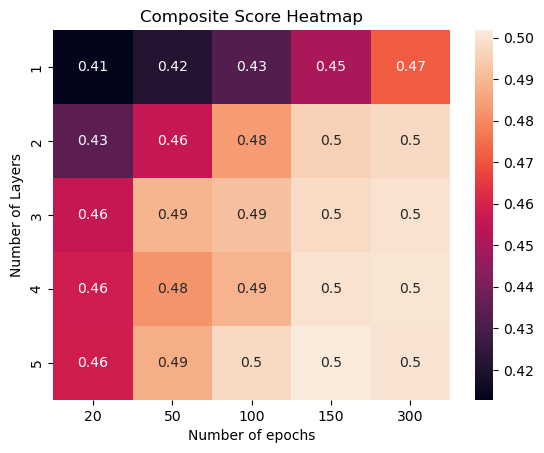

In [39]:
# Calculate the efficiency metric 
Eff2=Hyp_LE/Time_LE

plt.figure()
sns.heatmap(Eff2, annot=True, xticklabels=number_of_epochs, yticklabels=hidden_layer_options)
plt.title("Efficiency score")
plt.xlabel("Number of epochs")
plt.ylabel("Number of Hidden Layers")
plt.show()

# Calculate composite score (using inverted time)
alpha = 0.5  # weight for accuracy
beta = 0.5   # weight for time (inverted)
composite_score_matrix2 = alpha * Hyp_LE + beta * (1 / Time_LE)

# Plot heatmap of the composite scores
plt.figure()
sns.heatmap(composite_score_matrix2, annot=True, xticklabels=number_of_epochs, yticklabels=hidden_layer_options)
plt.title("Composite Score Heatmap")
plt.xlabel("Number of epochs")
plt.ylabel("Number of Layers")
plt.show()

Based on the evaluation metrics above there was decided to use a Neural Network with 4 hiddin layers, 32 neurons per layer and train it for 50 epochs. 

In [40]:
# Number of layers vs number Epochs - [L=4; E=50]
import time

tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_L4E50=[]
fl_L4E50=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    N=32
    model_L4E50=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model_L4E50.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

    # fit
    H_L4E50=model_L4E50.fit(X_trainK, 
                y_trainK, 
                epochs=50, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model_L4E50.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_L4E50.append(val_accuracy)
    fl_L4E50.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

# Average accuracy and loss across all folds
fa_L4E50_avg = np.mean(fa_L4E50)
fa_L4E50_std = np.std(fa_L4E50)
fl_L4E50_avg = np.mean(fl_L4E50)
fl_L4E50_std= np.std(fl_L4E50)

print(f'Average Validation Accuracy: {fa_L4E50_avg}')
print(f'Average Validation Loss: {fl_L4E50_avg}')
print(f'Standard deviation Validation Accuracy: {fa_L4E50_std}')
print(f'Standard deviation Validation Loss: {fl_L4E50_std}')

toc=time.time()
t_L4E50=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_L4E50))

Fold 1
Fold 1 Test Accuracy: 0.9782178401947021
Fold 1 Test Loss: 0.07651881873607635
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.9762375950813293
Fold 2 Test Loss: 0.06861136108636856
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.966269850730896
Fold 3 Test Loss: 0.09228058159351349
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.9464285969734192
Fold 4 Test Loss: 0.11749324202537537
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.942460298538208
Fold 5 Test Loss: 0.13564017415046692
---------------------------------------
Average Validation Accuracy: 0.9619228363037109
Average Validation Loss: 0.09810883551836014
Standard deviation Validation Accuracy: 0.014887564164744778
Standard deviation Validation Loss: 0.025117941641324307
---------------------------------------
Computational Time: 59.50183415412903


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.1657 
Test Accuracy: 0.9466192126274109
Test Loss: 0.1436639130115509
------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[1 0 1 2 1 0 0 0 2 1 2 1 1 0 0 1 2 2 2 2 0 1 1 1 2 2 0 0 0 2 0 1 1 0 2 2 2
 1 0 2 0 2 2 2 2 2 2 2 2 2]
[1 1 1 2 1 0 0 0 2 2 2 2 1 0 0 1 2 2 2 2 0 1 1 2 2 2 0 0 0 2 0 1 1 0 2 2 2
 1 0 2 0 2 2 2 2 2 2 2 2 2]
REGULAR    115
MAMRA       89
SANORA      77
Name: count, dtype: int64
-------------------------
REGULAR    106
SANORA      89
MAMRA       86
Name: count, dtype: int64
Confusion matrix, without normalization
[[ 86   0   0]
 [  3 103   0]
 [  0  12  77]]
Normalized confusion matrix - Adam
[[1.   0.   0.  ]
 [0.03 0.97 0.  ]
 [0.   0.13 0.87]]


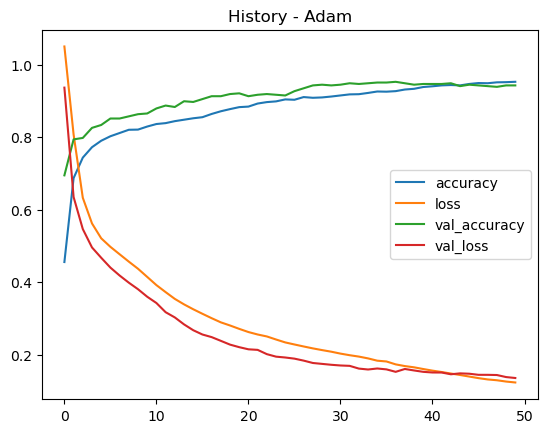

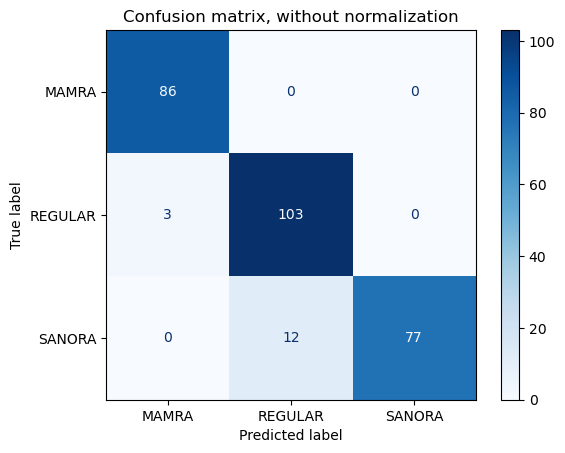

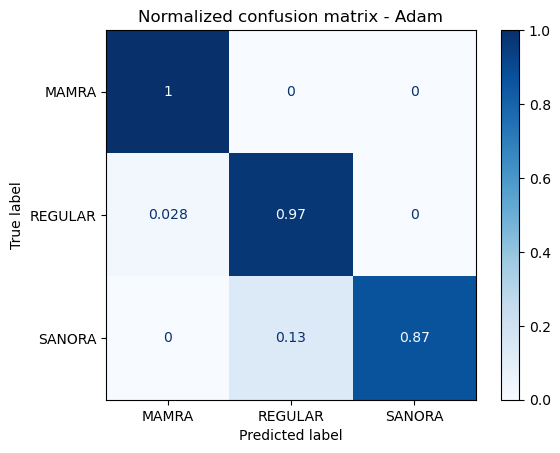

In [41]:
# Evaluate on the test set
test_loss, test_accuracy = model_L4E50.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

pd.DataFrame(H_L4E50.history).plot(title="History - Adam")  # Plot history
Type=df['Type'].unique()

# make predictions
y_pred_prob=model_L4E50.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels

# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

print(y_preds[0:50])
print(y_test_class[0:50])
pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

print(pred_class.value_counts())
print("-------------------------")
print(test_class.value_counts())

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix - Adam", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Compare different gradient-based NN training algorithms
Different gradient-based NN training algorithms are compared in this section. Up to know Adam has been used. The following algorithms will be used:
- SGD (Stochastic Gradient Descent)
- Adam (Adaptive Moment Estimation)
- RProp (Resilient backpropagation)
- RMSprop (Root Mean Square Propagation)

NN with 4 hidden layers and 32 neurons per layer were used. The devault values for each of the algorithms were used as a starting point, the learning rate and number of epochs were tuned for each. 

Fold 1
Fold 1 Test Accuracy: 0.7980198264122009
Fold 1 Test Loss: 0.46651363372802734
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.7861385941505432
Fold 2 Test Loss: 0.5786543488502502
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.761904776096344
Fold 3 Test Loss: 0.5542242527008057
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.7638888955116272
Fold 4 Test Loss: 0.5438320636749268
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.8095238208770752
Fold 5 Test Loss: 0.48559728264808655
---------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.5282 
Test Accuracy: 0.8007117509841919
Test Loss: 0.5276216864585876
------------------------
Average Validation Accuracy: 0.7838951826095581
Average Validation Loss: 0.5257643163204193
Standard deviation Validation Accuracy: 0.01868258579213407
Standard deviation Validation Loss: 0.042562427082926596
----

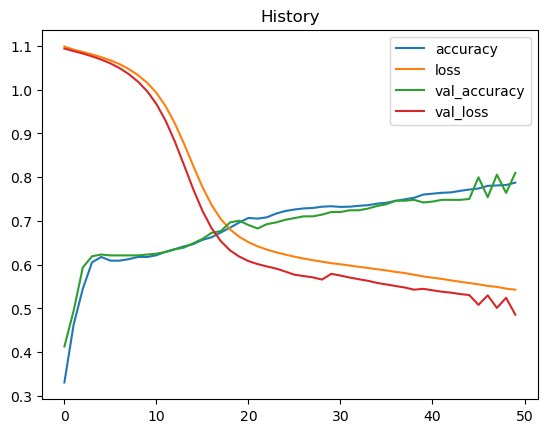

In [42]:
# SGD (Stochastic Gradient Descent)
import time

tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
np.random.seed(42)
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_SGD=[]
fl_SGD=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    N=32
    model_SGD=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model_SGD.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 metrics=["accuracy"])

    # fit
    H_SGD=model_SGD.fit(X_trainK, 
                y_trainK, 
                epochs=50, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model_SGD.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_SGD.append(val_accuracy)
    fl_SGD.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

pd.DataFrame(H_SGD.history).plot(title="History")  # Plot history

# Evaluate on the test set
test_loss, test_accuracy = model_SGD.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_SGD_avg = np.mean(fa_SGD)
fa_SGD_std = np.std(fa_SGD)
fl_SGD_avg = np.mean(fl_SGD)
fl_SGD_std= np.std(fl_SGD)

print(f'Average Validation Accuracy: {fa_SGD_avg}')
print(f'Average Validation Loss: {fl_SGD_avg}')
print(f'Standard deviation Validation Accuracy: {fa_SGD_std}')
print(f'Standard deviation Validation Loss: {fl_SGD_std}')

toc=time.time()
t_SGD=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_SGD))

In [43]:
import tensorflow as tf
import numpy as np

# RProp update function
def rprop_update(params, grads, prev_grads, step_sizes, scale_up=1.2, scale_down=0.5, min_step=1e-6, max_step=50.):
    new_prev_grads = []
    new_step_sizes = []

    for param, grad, prev_grad, step_size in zip(params, grads, prev_grads, step_sizes):
        grad_sign_change = grad * prev_grad

        # Update step sizes based on the sign of the gradients
        new_step_size = tf.where(grad_sign_change > 0,
                                 tf.minimum(step_size * scale_up, max_step),
                                 tf.where(grad_sign_change < 0,
                                          tf.maximum(step_size * scale_down, min_step),
                                          step_size))

        # Compute weight deltas
        delta = tf.where(grad > 0,
                         -new_step_size,
                         tf.where(grad < 0,
                                  new_step_size,
                                  tf.zeros_like(new_step_size)))

        # Apply weight deltas directly to the parameter
        param.assign_add(delta)

        # Reset gradient to zero if sign has changed
        grad = tf.where(grad_sign_change < 0, tf.zeros_like(grad), grad)

        # Append updates to new lists
        new_prev_grads.append(grad)
        new_step_sizes.append(new_step_size)

    return new_prev_grads, new_step_sizes

# Initialize previous gradients and step sizes
def initialize_rprop_variables(model, init_step_size=1e-3):
    prev_grads = [tf.zeros_like(var) for var in model.trainable_variables]
    step_sizes = [tf.ones_like(var) * init_step_size for var in model.trainable_variables]
    return prev_grads, step_sizes

def train_model_with_rprop(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    # Initialize previous gradients and step sizes
    prev_grads, step_sizes = initialize_rprop_variables(model)
    
    # Loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(x_batch, training=True)
                loss = loss_fn(y_batch, predictions)

            grads = tape.gradient(loss, model.trainable_variables)

            # Update model parameters using RProp
            prev_grads, step_sizes = rprop_update(
                model.trainable_variables, grads, prev_grads, step_sizes
            )

        # After each epoch, evaluate on the validation set
        val_loss, val_acc = evaluate_model(model, X_val, y_val)

# Evaluation function
def evaluate_model(model, X_val, y_val):
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    val_predictions = model(X_val, training=False)
    val_loss = loss_fn(y_val, val_predictions).numpy()
    val_accuracy = np.mean(np.argmax(val_predictions, axis=1) == np.argmax(y_val, axis=1))
    return val_loss, val_accuracy


In [44]:
tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_RProp=[]
fl_RProp=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    input_shape = (12,)
    num_classes = 3
    N = 32

    def create_model(input_shape, num_classes):
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Dense(N, activation='relu')(inputs)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        model = tf.keras.Model(inputs, outputs)
        return model

    model = create_model(input_shape, num_classes)

    # Now you can train the model using RProp
    H_RProp = train_model_with_rprop(model, X_trainK, y_trainK, X_val, y_val, epochs=50, batch_size=2803)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = evaluate_model(model, X_val, y_val)
    
    # Append accuracy and loss for the current fold
    fa_RProp.append(val_accuracy)
    fl_RProp.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')


# Evaluate on the test set
test_loss, test_accuracy = evaluate_model(model, X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_RProp_avg = np.mean(fa_RProp)
fa_RProp_std = np.std(fa_RProp)
fl_RProp_avg = np.mean(fl_RProp)
fl_RProp_std= np.std(fl_RProp)

print(f'Average Validation Accuracy: {fa_RProp_avg}')
print(f'Average Validation Loss: {fl_RProp_avg}')
print(f'Standard deviation Validation Accuracy: {fa_RProp_std}')
print(f'Standard deviation Validation Loss: {fl_RProp_std}')

toc=time.time()
t_RProp=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_RProp))

Fold 1
Fold 1 Test Accuracy: 0.8138613861386138
Fold 1 Test Loss: 0.3880607485771179
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.8118811881188119
Fold 2 Test Loss: 0.4818779230117798
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.8333333333333334
Fold 3 Test Loss: 0.38472190499305725
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.8690476190476191
Fold 4 Test Loss: 0.3451055586338043
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.8452380952380952
Fold 5 Test Loss: 0.3868926465511322
---------------------------------------
Test Accuracy: 0.8576512455516014
Test Loss: 0.3313497006893158
------------------------
Average Validation Accuracy: 0.8346723243752947
Average Validation Loss: 0.39733177423477173
Standard deviation Validation Accuracy: 0.021201982628505756
Standard deviation Validation Loss: 0.04523176699876785
---------------------------------------
Computational Time: 8.8424332141876

Fold 1
Fold 1 Test Accuracy: 0.8831683397293091
Fold 1 Test Loss: 0.275928795337677
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.9227722883224487
Fold 2 Test Loss: 0.19679005444049835
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.9345238208770752
Fold 3 Test Loss: 0.15043394267559052
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.9265872836112976
Fold 4 Test Loss: 0.186799556016922
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.9503968358039856
Fold 5 Test Loss: 0.12627092003822327
---------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9609 - loss: 0.1014 
Test Accuracy: 0.9430605173110962
Test Loss: 0.10584839433431625
------------------------
Average Validation Accuracy: 0.9234897136688233
Average Validation Loss: 0.18724465370178223
Standard deviation Validation Accuracy: 0.02227854384166979
Standard deviation Validation Loss: 0.05104706535744364
---

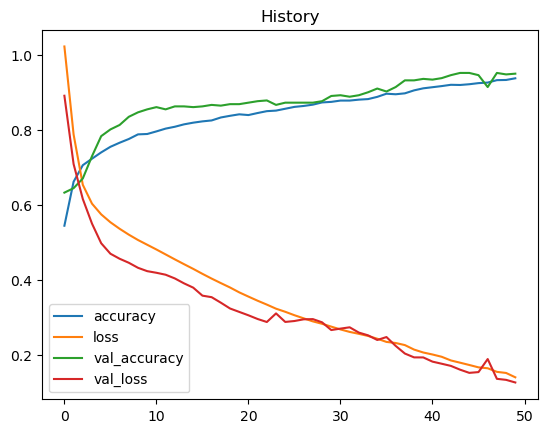

In [45]:
# RMSprop 
import time

tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_RMSprop=[]
fl_RMSprop=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    N=32
    model_RMSprop=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model_RMSprop.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.RMSprop(),
                 metrics=["accuracy"])

    # fit
    H_RMSprop=model_RMSprop.fit(X_trainK, 
                y_trainK, 
                epochs=50, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model_RMSprop.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_RMSprop.append(val_accuracy)
    fl_RMSprop.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

pd.DataFrame(H_RMSprop.history).plot(title="History")  # Plot history

# Evaluate on the test set
test_loss, test_accuracy = model_RMSprop.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_RMSprop_avg = np.mean(fa_RMSprop)
fa_RMSprop_std = np.std(fa_RMSprop)
fl_RMSprop_avg = np.mean(fl_RMSprop)
fl_RMSprop_std= np.std(fl_RMSprop)

print(f'Average Validation Accuracy: {fa_RMSprop_avg}')
print(f'Average Validation Loss: {fl_RMSprop_avg}')
print(f'Standard deviation Validation Accuracy: {fa_RMSprop_std}')
print(f'Standard deviation Validation Loss: {fl_RMSprop_std}')

toc=time.time()
t_RMSprop=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_RMSprop))

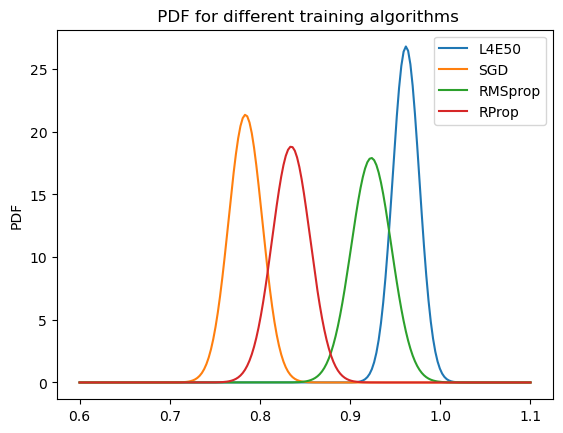

In [46]:
#define x-axis values
x = np.linspace (0.6, 1.1, 200) 

#calculate pdf of distributions for each x-value
yL4E50 = scipy.stats.norm.pdf(x=x, loc=fa_L4E50_avg, scale=fa_L4E50_std)
ySGD = scipy.stats.norm.pdf(x=x, loc=fa_SGD_avg, scale=fa_SGD_std)
yRProp = scipy.stats.norm.pdf(x=x, loc=fa_RProp_avg, scale=fa_RProp_std)
yRMSprop = scipy.stats.norm.pdf(x=x, loc=fa_RMSprop_avg, scale=fa_RMSprop_std)

#create plot of distribution
plt.figure()
plt.plot(x, yL4E50,label="L4E50")
plt.plot(x, ySGD,label="SGD")
plt.plot(x, yRMSprop,label="RMSprop")
plt.plot(x, yRProp,label="RProp")
plt.legend()
plt.title(" PDF for different training algorithms")
plt.ylabel("PDF")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion matrix, without normalization
[[80  4  2]
 [11 79 16]
 [ 0 23 66]]
Normalized confusion matrix - SGD
[[0.93 0.05 0.02]
 [0.1  0.75 0.15]
 [0.   0.26 0.74]]


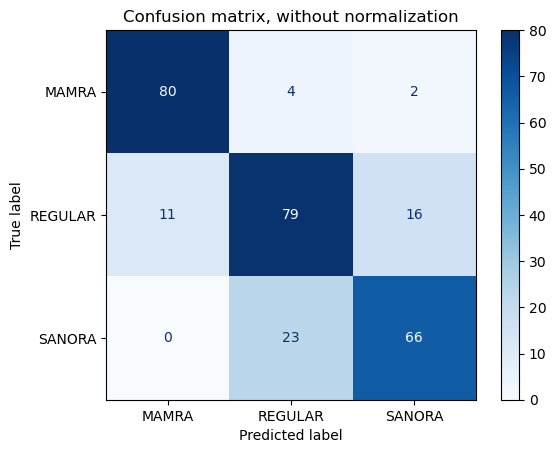

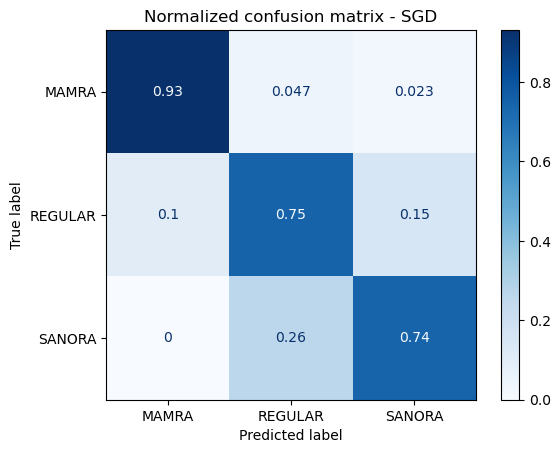

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Confusion matrix, without normalization
[[76  8  2]
 [ 2 90 14]
 [ 0 14 75]]
Normalized confusion matrix - RProp
[[0.88 0.09 0.02]
 [0.02 0.85 0.13]
 [0.   0.16 0.84]]


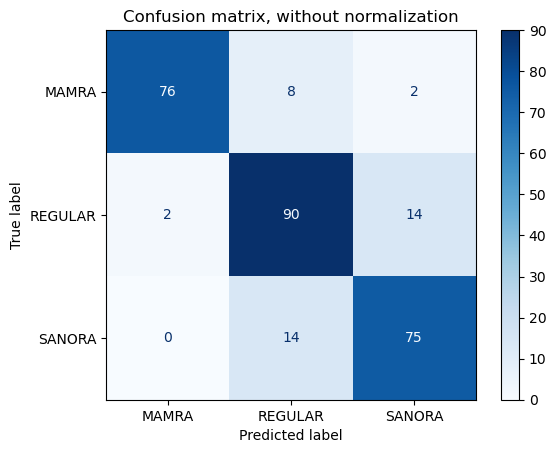

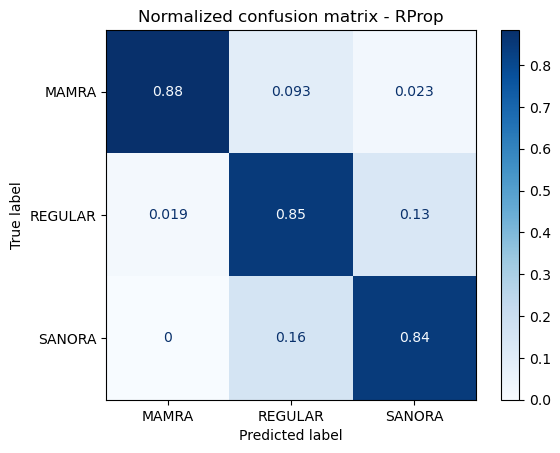

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion matrix, without normalization
[[85  1  0]
 [ 0 95 11]
 [ 0  4 85]]
Normalized confusion matrix - RMSprop
[[0.99 0.01 0.  ]
 [0.   0.9  0.1 ]
 [0.   0.04 0.96]]


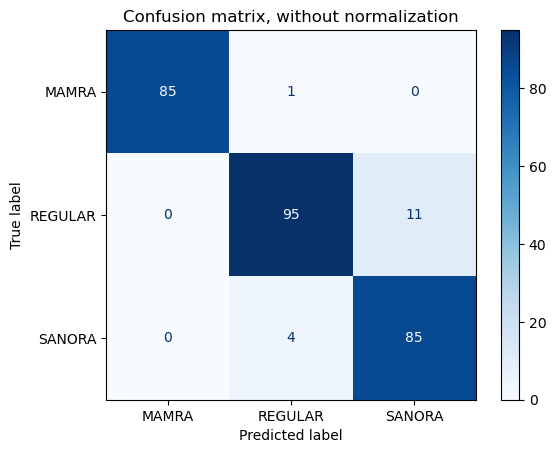

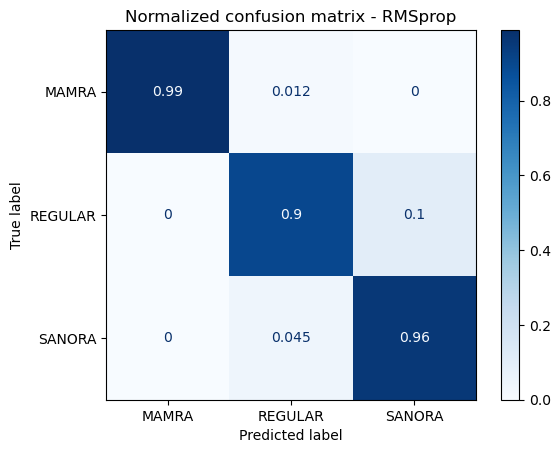

In [47]:
# make predictions
y_pred_prob=model_SGD.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels
# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix - SGD", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

# make predictions RProp
y_pred_prob=model.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels
# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix - RProp", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()


# make predictions  RMSprop
y_pred_prob=model_RMSprop.predict(X_test)
y_preds=np.argmax(y_pred_prob, axis=1)  # convert to class labels
# convert y_test from one-hot encoded to class labels
y_test_class=np.argmax(y_test, axis=1)

pred_class=[]
test_class=[]
for i in range(len(y_preds)):
    pred_class.append(Type[y_preds[i]])
    test_class.append(Type[y_test_class[i]])

pred_class = pd.DataFrame(pred_class)
test_class = pd.DataFrame(test_class)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix - RMSprop", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test_class, y_preds, display_labels = Type, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()



Fold 1
Fold 1 Test Accuracy: 0.8514851331710815
Fold 1 Test Loss: 0.6998816728591919
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.9742574095726013
Fold 2 Test Loss: 0.06451039016246796
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.966269850730896
Fold 3 Test Loss: 0.0572090782225132
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.9404761791229248
Fold 4 Test Loss: 0.09875597804784775
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.9801587462425232
Fold 5 Test Loss: 0.07174136489629745
---------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9739 - loss: 0.0609 
Test Accuracy: 0.982206404209137
Test Loss: 0.04737924411892891
------------------------
Average Validation Accuracy: 0.9425294637680054
Average Validation Loss: 0.19841969683766364
Standard deviation Validation Accuracy: 0.04749635255332751
Standard deviation Validation Loss: 0.25112407739831843
---

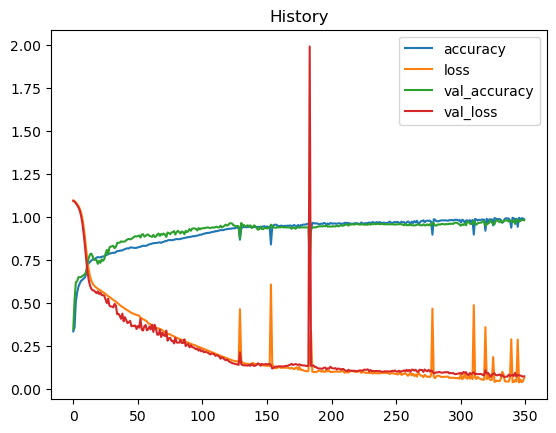

In [48]:
# SGD (Stochastic Gradient Descent)
import time

tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
np.random.seed(42)
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_SGDb=[]
fl_SGDb=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    N=32
    model_SGDb=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model_SGDb.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 metrics=["accuracy"])

    # fit
    H_SGDb=model_SGDb.fit(X_trainK, 
                y_trainK, 
                epochs=350, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model_SGDb.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_SGDb.append(val_accuracy)
    fl_SGDb.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

pd.DataFrame(H_SGDb.history).plot(title="History")  # Plot history

# Evaluate on the test set
test_loss, test_accuracy = model_SGDb.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_SGDb_avg = np.mean(fa_SGDb)
fa_SGDb_std = np.std(fa_SGDb)
fl_SGDb_avg = np.mean(fl_SGDb)
fl_SGDb_std= np.std(fl_SGDb)

print(f'Average Validation Accuracy: {fa_SGDb_avg}')
print(f'Average Validation Loss: {fl_SGDb_avg}')
print(f'Standard deviation Validation Accuracy: {fa_SGDb_std}')
print(f'Standard deviation Validation Loss: {fl_SGDb_std}')

toc=time.time()
t_SGDb=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_SGDb))

In [49]:
tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_RPropb=[]
fl_RPropb=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    input_shape = (12,)
    num_classes = 3
    N = 32

    def create_model(input_shape, num_classes):
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Dense(N, activation='relu')(inputs)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        model = tf.keras.Model(inputs, outputs)
        return model

    model_RPropb = create_model(input_shape, num_classes)

    # Now you can train the model using RProp
    H_RPropb = train_model_with_rprop(model_RPropb, X_trainK, y_trainK, X_val, y_val, epochs=200, batch_size=2803)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = evaluate_model(model_RPropb, X_val, y_val)
    
    # Append accuracy and loss for the current fold
    fa_RPropb.append(val_accuracy)
    fl_RPropb.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')


# Evaluate on the test set
test_loss, test_accuracy = evaluate_model(model_RPropb, X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_RPropb_avg = np.mean(fa_RPropb)
fa_RPropb_std = np.std(fa_RPropb)
fl_RPropb_avg = np.mean(fl_RPropb)
fl_RPropb_std= np.std(fl_RPropb)

print(f'Average Validation Accuracy: {fa_RPropb_avg}')
print(f'Average Validation Loss: {fl_RPropb_avg}')
print(f'Standard deviation Validation Accuracy: {fa_RPropb_std}')
print(f'Standard deviation Validation Loss: {fl_RPropb_std}')

toc=time.time()
t_RPropb=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_RPropb))

Fold 1
Fold 1 Test Accuracy: 0.9623762376237623
Fold 1 Test Loss: 0.5725371837615967
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.9663366336633663
Fold 2 Test Loss: 0.4967195391654968
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.9662698412698413
Fold 3 Test Loss: 0.4233244061470032
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.9682539682539683
Fold 4 Test Loss: 0.265275776386261
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.9722222222222222
Fold 5 Test Loss: 0.2899334728717804
---------------------------------------
Test Accuracy: 0.9644128113879004
Test Loss: 0.20498237013816833
------------------------
Average Validation Accuracy: 0.967091780606632
Average Validation Loss: 0.4095580577850342
Standard deviation Validation Accuracy: 0.0031985711841751975
Standard deviation Validation Loss: 0.11787810921669006
---------------------------------------
Computational Time: 34.0694944858551


Fold 1
Fold 1 Test Accuracy: 0.9881188273429871
Fold 1 Test Loss: 0.12570102512836456
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.9801980257034302
Fold 2 Test Loss: 0.08569996058940887
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.97817462682724
Fold 3 Test Loss: 0.0556398443877697
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.9722222089767456
Fold 4 Test Loss: 0.0701119676232338
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.9900793433189392
Fold 5 Test Loss: 0.04647507518529892
---------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9870 - loss: 0.0245 
Test Accuracy: 0.9893238544464111
Test Loss: 0.027090469375252724
------------------------
Average Validation Accuracy: 0.9817586064338684
Average Validation Loss: 0.07672557458281518
Standard deviation Validation Accuracy: 0.006571305362262959
Standard deviation Validation Loss: 0.02786601833419373
-

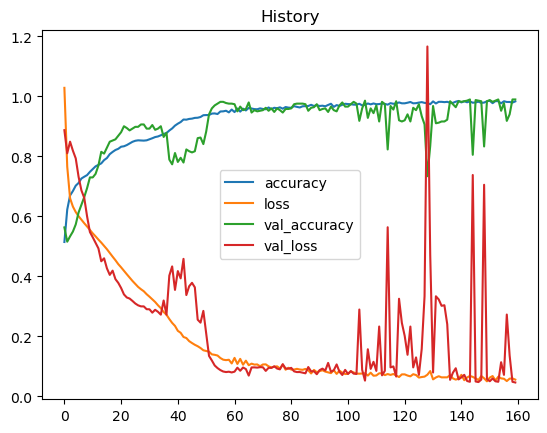

In [50]:
# RMSprop 
import time

tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
np.random.seed(42)
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_RMSpropb=[]
fl_RMSpropb=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    N=32
    model_RMSpropb=tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # compile
    model_RMSpropb.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.RMSprop(),
                 metrics=["accuracy"])

    # fit
    H_RMSpropb=model_RMSpropb.fit(X_trainK, 
                y_trainK, 
                epochs=160, 
                validation_data=(X_val, y_val),
                verbose=0)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = model_RMSpropb.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_RMSpropb.append(val_accuracy)
    fl_RMSpropb.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')

pd.DataFrame(H_RMSpropb.history).plot(title="History")  # Plot history

# Evaluate on the test set
test_loss, test_accuracy = model_RMSpropb.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_RMSpropb_avg = np.mean(fa_RMSpropb)
fa_RMSpropb_std = np.std(fa_RMSpropb)
fl_RMSpropb_avg = np.mean(fl_RMSpropb)
fl_RMSpropb_std= np.std(fl_RMSpropb)

print(f'Average Validation Accuracy: {fa_RMSpropb_avg}')
print(f'Average Validation Loss: {fl_RMSpropb_avg}')
print(f'Standard deviation Validation Accuracy: {fa_RMSpropb_std}')
print(f'Standard deviation Validation Loss: {fl_RMSpropb_std}')

toc=time.time()
t_RMSpropb=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_RMSpropb))

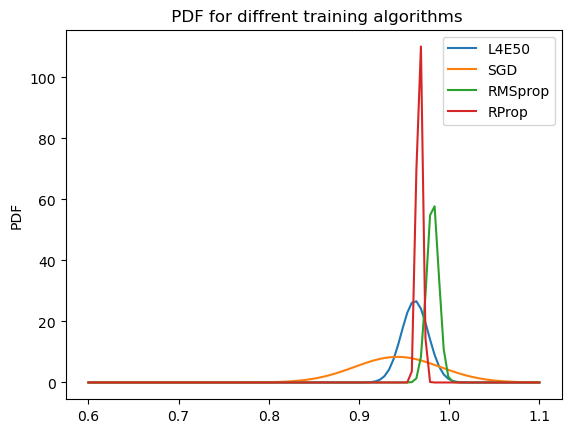

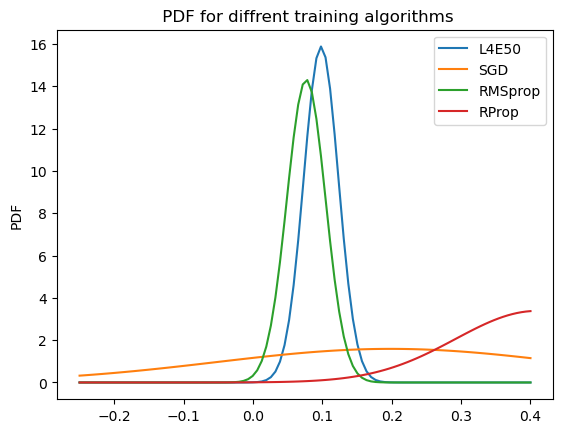

In [51]:
#define x-axis values
x = np.linspace (0.6, 1.1, 100) 

#calculate pdf of distributions for each x-value
yL4E50 = scipy.stats.norm.pdf(x=x, loc=fa_L4E50_avg, scale=fa_L4E50_std)
ySGDb = scipy.stats.norm.pdf(x=x, loc=fa_SGDb_avg, scale=fa_SGDb_std)
yRMSpropb = scipy.stats.norm.pdf(x=x, loc=fa_RMSpropb_avg, scale=fa_RMSpropb_std)
yRPropb = scipy.stats.norm.pdf(x=x, loc=fa_RPropb_avg, scale=fa_RPropb_std)

#create plot of distribution
plt.figure()
plt.plot(x, yL4E50,label="L4E50")
plt.plot(x, ySGDb,label="SGD")
plt.plot(x, yRMSpropb,label="RMSprop")
plt.plot(x, yRPropb,label="RProp")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.show()

#define x-axis values
xl = np.linspace (-0.25, 0.4, 100) 

#calculate pdf of distributions for each x-value
yL4E50l = scipy.stats.norm.pdf(x=xl, loc=fl_L4E50_avg, scale=fl_L4E50_std)
ySGDbl = scipy.stats.norm.pdf(x=xl, loc=fl_SGDb_avg, scale=fl_SGDb_std)
yRMSpropbl = scipy.stats.norm.pdf(x=xl, loc=fl_RMSpropb_avg, scale=fl_RMSpropb_std)
yRPropbl = scipy.stats.norm.pdf(x=xl, loc=fl_RPropb_avg, scale=fl_RPropb_std)

#create plot of distribution
plt.figure()
plt.plot(xl, yL4E50l, label="L4E50")
plt.plot(xl, ySGDbl, label="SGD")
plt.plot(xl, yRMSpropbl, label="RMSprop")
plt.plot(xl, yRPropbl, label="RProp")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.show()

In [52]:
H_L4E50.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

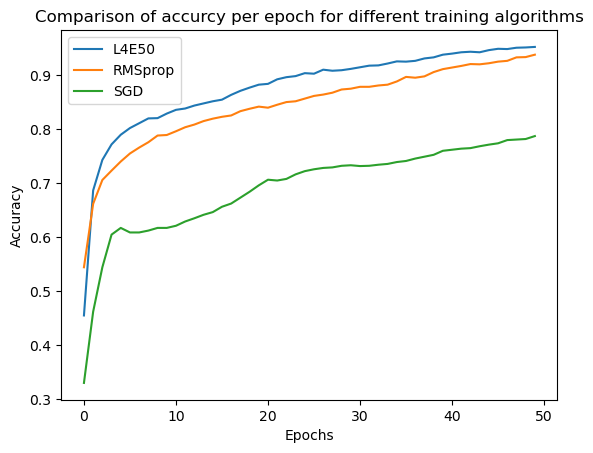

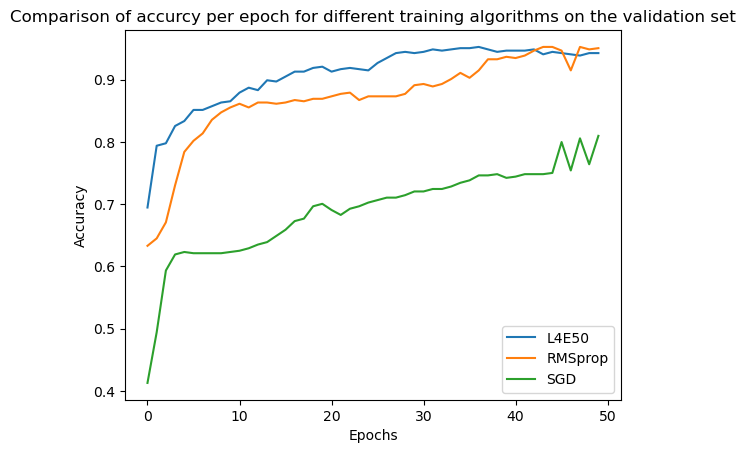

In [53]:
a_L4E50=H_L4E50.history['accuracy']
a_RMSprop=H_RMSprop.history['accuracy']
a_SGD=H_SGD.history['accuracy']

plt.figure()
plt.plot(a_L4E50, label="L4E50")
plt.plot(a_RMSprop, label="RMSprop")
plt.plot(a_SGD, label="SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of accurcy per epoch for different training algorithms")
plt.show()

av_L4E50=H_L4E50.history['val_accuracy']
av_RMSprop=H_RMSprop.history['val_accuracy']
av_SGD=H_SGD.history['val_accuracy']

plt.figure()
plt.plot(av_L4E50, label="L4E50")
plt.plot(av_RMSprop, label="RMSprop")
plt.plot(av_SGD, label="SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of accurcy per epoch for different training algorithms on the validation set")
plt.show()

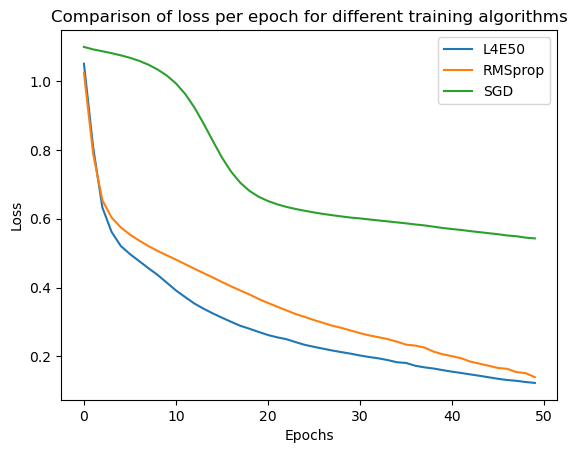

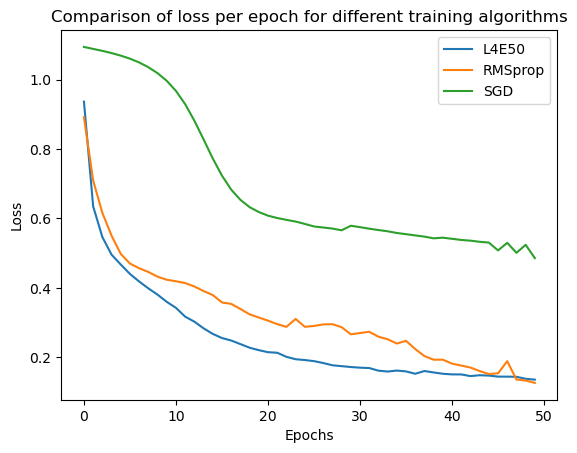

In [54]:
l_L4E50=H_L4E50.history['loss']
l_RMSprop=H_RMSprop.history['loss']
l_SGD=H_SGD.history['loss']

plt.figure()
plt.plot(l_L4E50, label="L4E50")
plt.plot(l_RMSprop, label="RMSprop")
plt.plot(l_SGD, label="SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of loss per epoch for different training algorithms")
plt.show()

lv_L4E50=H_L4E50.history['val_loss']
lv_RMSprop=H_RMSprop.history['val_loss']
lv_SGD=H_SGD.history['val_loss']

plt.figure()
plt.plot(lv_L4E50, label="L4E50")
plt.plot(lv_RMSprop, label="RMSprop")
plt.plot(lv_SGD, label="SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of loss per epoch for different training algorithms")
plt.show()

## Hybrid learning

In [55]:
# Weighted hybrid optimizer (RMSprop + SGD)
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import tensorflow as tf

tic = time.time()

k = 5  # number of folds
tf.random.set_seed(42)  # set random seed
np.random.seed(42)
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# Initialize lists to store the accuracy and loss for each fold
fa_hybrid = []
fl_hybrid = []

# Define weights for combining RMSprop and Adam
rmsprop_weight = 0.0
adam_weight = 1

# Custom training step with weighted gradient update
def train_step(x, y, model, rmsprop_optimizer, adam_optimizer):
    with tf.GradientTape(persistent=True) as tape:
        predictions = model(x, training=True)
        loss = tf.keras.losses.CategoricalCrossentropy()(y, predictions)
    
    # Compute gradients for both optimizers
    rmsprop_gradients = tape.gradient(loss, model.trainable_variables)
    adam_gradients = tape.gradient(loss, model.trainable_variables)

    # Weighted average of gradients
    averaged_gradients = [
        rmsprop_weight * rms_grad + adam_weight * adam_grad
        for rms_grad, adam_grad in zip(rmsprop_gradients, adam_gradients)
    ]

    # Apply averaged gradients using one of the optimizers
    rmsprop_optimizer.apply_gradients(zip(averaged_gradients, model.trainable_variables))

    return loss

# Build the model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}")

    # Split the data
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create the model
    N = 32
    model_hybrid = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(N, activation='relu'),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(N, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    # Compile the model for tracking metrics
    model_hybrid.compile(optimizer=tf.keras.optimizers.Adam(),  # Using RMSprop here for metrics
                         loss=tf.keras.losses.CategoricalCrossentropy(),
                         metrics=["accuracy"])

    # Define optimizers outside of tf.function
    rmsprop_optimizer = tf.keras.optimizers.RMSprop()
    adam_optimizer = tf.keras.optimizers.Adam()

    # Train the model using a custom loop
    epochs = 50
    batch_size = 200

    for epoch in range(epochs):
        for i in range(0, len(X_trainK), batch_size):
            x_batch = X_trainK.iloc[i:i + batch_size]
            y_batch = y_trainK.iloc[i:i + batch_size]
            train_step(x_batch, y_batch, model_hybrid, rmsprop_optimizer, adam_optimizer)

    # Evaluate the model on the validation set for the current fold
    val_loss, val_accuracy = model_hybrid.evaluate(X_val, y_val, verbose=0)
    
    # Append accuracy and loss for the current fold
    fa_hybrid.append(val_accuracy)
    fl_hybrid.append(val_loss)
    
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Validation Loss: {val_loss}')
    print('---------------------------------------')

# Evaluate on the test set
test_loss, test_accuracy = model_hybrid.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_hybrid_avg = np.mean(fa_hybrid)
fa_hybrid_std = np.std(fa_hybrid)
fl_hybrid_avg = np.mean(fl_hybrid)
fl_hybrid_std = np.std(fl_hybrid)

print(f'Average Validation Accuracy: {fa_hybrid_avg}')
print(f'Average Validation Loss: {fl_hybrid_avg}')
print(f'Standard Deviation Validation Accuracy: {fa_hybrid_std}')
print(f'Standard Deviation Validation Loss: {fl_hybrid_std}')

toc = time.time()
t_hybrid = toc - tic
print('---------------------------------------')
print("Computational Time:", (t_hybrid))

# Compare with your RMSprop model results
print(f'RMSprop Model Time: {t_RMSprop}')
print(f'Adam Model Time: {t_L4E50}')


Fold 1
Fold 1 Validation Accuracy: 0.8495049476623535
Fold 1 Validation Loss: 0.36983364820480347
---------------------------------------
Fold 2
Fold 2 Validation Accuracy: 0.8198019862174988
Fold 2 Validation Loss: 0.47327396273612976
---------------------------------------
Fold 3
Fold 3 Validation Accuracy: 0.7936508059501648
Fold 3 Validation Loss: 0.52518230676651
---------------------------------------
Fold 4
Fold 4 Validation Accuracy: 0.8214285969734192
Fold 4 Validation Loss: 0.4543165862560272
---------------------------------------
Fold 5
Fold 5 Validation Accuracy: 0.8472222089767456
Fold 5 Validation Loss: 0.39437243342399597
---------------------------------------
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.4062 
Test Accuracy: 0.8576512336730957
Test Loss: 0.4124568998813629
------------------------
Average Validation Accuracy: 0.8263217091560364
Average Validation Loss: 0.4433957874774933
Standard Deviation Validation Accuracy: 0.02053353691262493
S

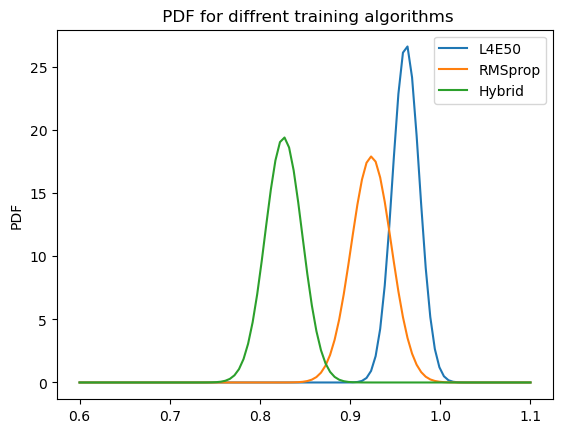

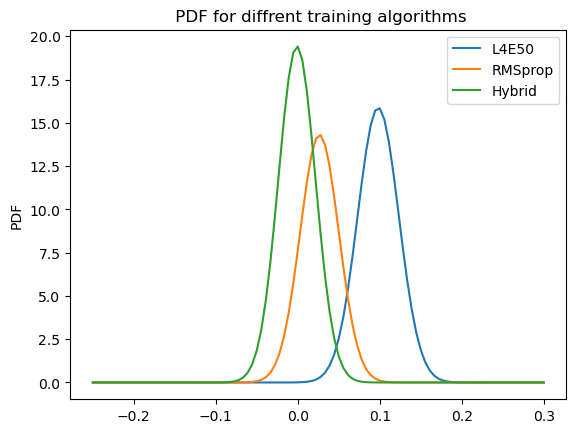

In [56]:
#define x-axis values
x = np.linspace (0.6, 1.1, 100) 

#calculate pdf of distributions for each x-value
yL4E50 = scipy.stats.norm.pdf(x=x, loc=fa_L4E50_avg, scale=fa_L4E50_std)
yRMSprop = scipy.stats.norm.pdf(x=x, loc=fa_RMSprop_avg, scale=fa_RMSprop_std)
yHybrid = scipy.stats.norm.pdf(x=x, loc=fa_hybrid_avg, scale=fa_hybrid_std)

#create plot of distribution
plt.figure()
plt.plot(x, yL4E50,label="L4E50")
plt.plot(x, yRMSprop,label="RMSprop")
plt.plot(x, yHybrid ,label="Hybrid")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.show()

#define x-axis values
xl = np.linspace (-0.25, 0.3, 100) 

#calculate pdf of distributions for each x-value
yL4E50l = scipy.stats.norm.pdf(x=xl, loc=fl_L4E50_avg, scale=fl_L4E50_std)
yRMSpropl = scipy.stats.norm.pdf(x=xl, loc=fl_RMSprop_avg, scale=fl_RMSprop_std)
yHybridl = scipy.stats.norm.pdf(x=xl, loc=fl_hybrid_avg, scale=fl_hybrid_std)

#create plot of distribution
plt.figure()
plt.plot(xl, yL4E50l, label="L4E50")
plt.plot(xl, yRMSpropbl, label="RMSprop")
plt.plot(xl, yHybrid, label="Hybrid")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.show()

In [57]:
import tensorflow as tf
import numpy as np


# Define Adam optimizer and its parameters
learning_rate = 0.001
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-7

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

def hyb_update(params, grads, prev_grads, step_sizes, t, scale_up=1.2, scale_down=0.5, min_step=1e-6, max_step=50.):
    new_prev_grads = []
    new_step_sizes = []

    first_moment = [tf.zeros_like(var) for var in params]
    second_moment = [tf.zeros_like(var) for var in params]
    parameter_updates = []

    for i, (param, grad, prev_grad, step_size) in enumerate(zip(params, grads, prev_grads, step_sizes)):
        if grad is None:
            continue  # Skip if the gradient is None

        grad_sign_change = grad * prev_grad
        new_step_size = tf.where(grad_sign_change > 0,
                                 tf.minimum(step_size * scale_up, max_step),
                                 tf.where(grad_sign_change < 0,
                                          tf.maximum(step_size * scale_down, min_step),
                                          step_size))

        delta_RProp = tf.where(grad > 0, -new_step_size,
                               tf.where(grad < 0, new_step_size, tf.zeros_like(new_step_size)))

        grad = tf.where(grad_sign_change < 0, tf.zeros_like(grad), grad)

        first_moment[i] = beta_1 * first_moment[i] + (1 - beta_1) * grad
        second_moment[i] = beta_2 * second_moment[i] + (1 - beta_2) * tf.square(grad)

        m_hat = first_moment[i] / (1 - tf.pow(beta_1, t))
        v_hat = second_moment[i] / (1 - tf.pow(beta_2, t))

        delta_Adam = -learning_rate * m_hat / (tf.sqrt(v_hat) + epsilon)
        delta = 0.4 * delta_Adam + 0.6 * delta_RProp

        param.assign_add(delta)
        parameter_updates.append(delta)

        new_prev_grads.append(grad)
        new_step_sizes.append(new_step_size)

    return new_prev_grads, new_step_sizes


# Initialize previous gradients and step sizes
def initialize_hyb_variables(model, init_step_size=1e-3):
    prev_grads = [tf.zeros_like(var) for var in model.trainable_variables]
    step_sizes = [tf.ones_like(var) * init_step_size for var in model.trainable_variables]
    return prev_grads, step_sizes

def train_model_with_hyb(model, X_train, y_train, X_val, y_val, epochs=200, batch_size=2803):
    # Initialize previous gradients and step sizes
    prev_grads, step_sizes = initialize_hyb_variables(model)
    
    # Loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    for epoch in range(epochs):
        t = epoch + 1  # Initialize t for Adam updates
        for i in range(0, len(X_train), batch_size):
            x_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            with tf.GradientTape() as tape:
                predictions = model(x_batch, training=True)
                loss = loss_fn(y_batch, predictions)

            grads = tape.gradient(loss, model.trainable_variables)

            # Update model parameters 
            prev_grads, step_sizes = hyb_update(
                model.trainable_variables, grads, prev_grads, step_sizes, t
            )

        # After each epoch, evaluate on the validation set
        val_loss, val_acc = evaluate_model(model, X_val, y_val)

# Evaluation function
def evaluate_model(model, X_val, y_val):
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    val_predictions = model(X_val, training=False)
    val_loss = loss_fn(y_val, val_predictions).numpy()
    val_accuracy = np.mean(np.argmax(val_predictions, axis=1) == np.argmax(y_val, axis=1))
    return val_loss, val_accuracy


In [58]:
tic=time.time()

k=5  # set number of folds
tf.random.set_seed(42) # set random seed
kf=KFold(n_splits=k, shuffle=True, random_state=42)  # K-fold indices

# initialise lists to store the accuracy and the loss for each fold
fa_hyb=[]
fl_hyb=[]

#Build model for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}") 

    # Split the data using .iloc for DataFrame
    X_trainK, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_trainK, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # create model
    input_shape = (12,)
    num_classes = 3
    N = 32

    def create_model(input_shape, num_classes):
        inputs = tf.keras.Input(shape=input_shape)
        x = tf.keras.layers.Dense(N, activation='relu')(inputs)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        x = tf.keras.layers.Dense(N, activation='relu')(x)
        outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
        model = tf.keras.Model(inputs, outputs)
        return model

    model = create_model(input_shape, num_classes)

    # Now you can train the model using RProp
    H_hyb = train_model_with_hyb(model, X_trainK, y_trainK, X_val, y_val, epochs=200, batch_size=2803)

    # Evaluate the model on the test set for the current fold
    val_loss, val_accuracy = evaluate_model(model, X_val, y_val)
    
    # Append accuracy and loss for the current fold
    fa_hyb.append(val_accuracy)
    fl_hyb.append(val_loss)
    
    print(f'Fold {fold+1} Test Accuracy: {val_accuracy}')
    print(f'Fold {fold+1} Test Loss: {val_loss}')
    print('---------------------------------------')


# Evaluate on the test set
test_loss, test_accuracy = evaluate_model(model, X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
print('------------------------')

# Average accuracy and loss across all folds
fa_hyb_avg = np.mean(fa_hyb)
fa_hyb_std = np.std(fa_hyb)
fl_hyb_avg = np.mean(fl_hyb)
fl_hyb_std= np.std(fl_hyb)

print(f'Average Validation Accuracy: {fa_hyb_avg}')
print(f'Average Validation Loss: {fl_hyb_avg}')
print(f'Standard deviation Validation Accuracy: {fa_hyb_std}')
print(f'Standard deviation Validation Loss: {fl_hyb_std}')

toc=time.time()
t_hyb=toc-tic
print('---------------------------------------')
print("Computational Time:", (t_hyb))

# Compare with your RMSprop model results
print(f'RMSprop Model Time: {t_RProp}')
print(f'Adam Model Time: {t_L4E50}')

Fold 1
Fold 1 Test Accuracy: 0.9168316831683169
Fold 1 Test Loss: 0.26147642731666565
---------------------------------------
Fold 2
Fold 2 Test Accuracy: 0.8673267326732673
Fold 2 Test Loss: 0.3194933533668518
---------------------------------------
Fold 3
Fold 3 Test Accuracy: 0.9444444444444444
Fold 3 Test Loss: 0.1500234603881836
---------------------------------------
Fold 4
Fold 4 Test Accuracy: 0.878968253968254
Fold 4 Test Loss: 0.2977994382381439
---------------------------------------
Fold 5
Fold 5 Test Accuracy: 0.9265873015873016
Fold 5 Test Loss: 0.23126962780952454
---------------------------------------
Test Accuracy: 0.9323843416370107
Test Loss: 0.1323217898607254
------------------------
Average Validation Accuracy: 0.9068316831683167
Average Validation Loss: 0.2520124614238739
Standard deviation Validation Accuracy: 0.029127361948294336
Standard deviation Validation Loss: 0.059281881898641586
---------------------------------------
Computational Time: 50.787638902664

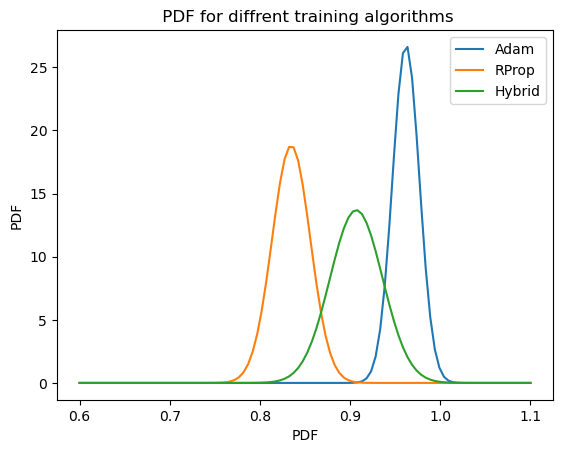

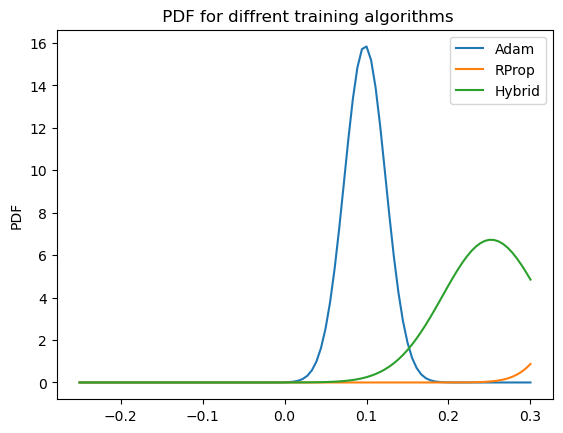

In [59]:
#define x-axis values
x = np.linspace (0.6, 1.1, 100) 

#calculate pdf of distributions for each x-value
yL4E50 = scipy.stats.norm.pdf(x=x, loc=fa_L4E50_avg, scale=fa_L4E50_std)
yRProp = scipy.stats.norm.pdf(x=x, loc=fa_RProp_avg, scale=fa_RProp_std)
yhyb = scipy.stats.norm.pdf(x=x, loc=fa_hyb_avg, scale=fa_hyb_std)

#create plot of distribution
plt.figure()
plt.plot(x, yL4E50,label="Adam")
plt.plot(x, yRProp,label="RProp")
plt.plot(x, yhyb ,label="Hybrid")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.xlabel("PDF")
plt.show()

#define x-axis values
xl = np.linspace (-0.25, 0.3, 100) 

#calculate pdf of distributions for each x-value
yL4E50l = scipy.stats.norm.pdf(x=xl, loc=fl_L4E50_avg, scale=fl_L4E50_std)
yRPropl = scipy.stats.norm.pdf(x=xl, loc=fl_RProp_avg, scale=fl_RProp_std)
yhybl = scipy.stats.norm.pdf(x=xl, loc=fl_hyb_avg, scale=fl_hyb_std)

#create plot of distribution
plt.figure()
plt.plot(xl, yL4E50l, label="Adam")
plt.plot(xl, yRPropl, label="RProp")
plt.plot(xl, yhybl, label="Hybrid")
plt.legend()
plt.title(" PDF for diffrent training algorithms")
plt.ylabel("PDF")
plt.show()